2 Data wrangling

## 2.1 Contents<a id='2.1_Contents'></a>
* [2 Data wrangling](#2_Data_wrangling)
  * [2.1 Contents](#2.1_Contents)
  * [2.2 Introduction](#2.2_Introduction)
    * [2.2.1 Recap Of Data Science Problem](#2.2.1_Recap_Of_Data_Science_Problem)
    * [2.3 Imports](#2.3_Imports)
  * [2.4 Objectives](#2.4_Objectives)
  * [2.5 Load The Job Data](#2.5_Load_The_Ski_Resort_Data)
  * [2.6 Explore The Data](#2.6_Explore_The_Data)
      * [2.6.3.2 City And State](#2.6.3.2_City_And_State)
      * [2.6.3.5 Distribution Of Average Salary By State](#2.6.3.5_Distribution_Of_Average_Salary_By_State)
          * [2.6.3.5.1 Average Salary by state](#2.6.3.5.1_Average_salary_by_state)
      * [2.6.4 Numeric Features](#2.6.4_Numeric_Features)
      

## 2.2 Introduction<a id='2.2_Introduction'></a>

This step focuses on collecting your data, organizing it, and making sure it's well defined. Paying attention to these tasks will pay off greatly later on. Some data cleaning can be done at this stage, but it's important not to be overzealous in your cleaning before you've explored the data to better understand it.

### 2.2.1 Recap Of Data Science Problem<a id='2.2.1_Recap_Of_Data_Science_Problem'></a>

The purpose of this data science project is to arrive at an average salary model for Florita State in our job market.
Florida's median salary could increase your position in the job market. We also don't have a clear idea of which skills are 
most important to job seekers, particularly which ones they are most likely to pay the most for.
This project aims to build a predictive model for the average salary based on a series of skills, presumed by states or 
cities. This model will be used to provide guidance on average salary and future investment in skills.

## 2.3 Imports<a id='2.3_Imports'></a>

In [130]:
# Import CSV file and output header
import os
import pandas as pd
import numpy as np
import datetime
import re as re
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pandas.api.types import is_string_dtype, is_numeric_dtype


In [131]:
pd.set_option('display.max_columns', None)
dsfs= pd.read_csv('./data/raw/1_glassdoor1.csv')
dsfm= pd.read_csv('./data/raw/2_900_DS_jobs_US_raw.csv')
dsfb= pd.read_csv('./data/raw/3_DataScientist.csv')
dsfs.head(5)
dsfm.head(5)
dsfb.head(5)

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


## 2.4 Objectives<a id='2.4_Objectives'></a>

        There are some fundamental questions to resolve in this notebook before you move on.

Do you think you may have the data you need to tackle the desired question?
Have you identified the required target value?
Do you have potentially useful features?
Do you have any fundamental issues with the data?

## 2.5 Load The Job Data<a id='2.5_Load_The_Ski_Resort_Data'></a>

In [132]:
# Get data types of columns
dsfs.dtypes


Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
hourly                 int64
employer_provided      int64
min_salary             int64
max_salary             int64
avg_salary           float64
company_txt           object
job_state             object
same_state             int64
age                    int64
python_yn              int64
R_yn                   int64
spark                  int64
aws                    int64
excel                  int64
dtype: object

In [133]:
dsfm.dtypes

Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
dtype: object

In [134]:
dsfb.dtypes

Unnamed: 0             int64
index                  int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
Easy Apply            object
dtype: object

In [135]:
# Get DataFrame information
dsfs.info()
dsfm.info()
dsfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  employer_provided  742 non-null    int64  
 16  min_salary         742 non

In [136]:
# Drop unnecessary columns
lists=['Headquarters','Competitors','hourly','employer_provided','min_salary','max_salary','avg_salary','company_txt','job_state','same_state','age','python_yn','R_yn','spark','aws','excel']
#listm=['','','','','','','','','','','','','','']
listb=['Unnamed: 0','index','Easy Apply','Headquarters','Competitors','Easy Apply']

In [137]:
drop_dsfs=dsfs.drop(lists,axis=1)
print(drop_dsfs)         

                                             Job Title  \
0                                       Data Scientist   
1                            Healthcare Data Scientist   
2                                       Data Scientist   
3                                       Data Scientist   
4                                       Data Scientist   
..                                                 ...   
737           Sr Scientist, Immuno-Oncology - Oncology   
738                               Senior Data Engineer   
739  Project Scientist - Auton Lab, Robotics Institute   
740                               Data Science Manager   
741          Research Scientist – Security and Privacy   

                 Salary Estimate  \
0     $53K-$91K (Glassdoor est.)   
1    $63K-$112K (Glassdoor est.)   
2     $80K-$90K (Glassdoor est.)   
3     $56K-$97K (Glassdoor est.)   
4    $86K-$143K (Glassdoor est.)   
..                           ...   
737  $58K-$111K (Glassdoor est.)   
738  $72K-$133K

In [138]:
drop_dsfs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Size               742 non-null    object 
 7   Founded            742 non-null    int64  
 8   Type of ownership  742 non-null    object 
 9   Industry           742 non-null    object 
 10  Sector             742 non-null    object 
 11  Revenue            742 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 69.7+ KB


In [139]:
drop_dsfb=dsfb.drop(listb,axis=1) 

In [140]:
print(drop_dsfb)

                                              Job Title  \
0                                 Senior Data Scientist   
1                     Data Scientist, Product Analytics   
2                                  Data Science Manager   
3                                          Data Analyst   
4                                Director, Data Science   
...                                                 ...   
3904                                  AWS Data Engineer   
3905                              Data Analyst â Junior   
3906                   Security Analytics Data Engineer   
3907                   Security Analytics Data Engineer   
3908  Patient Safety Physician or Safety Scientist -...   

                   Salary Estimate  \
0     $111K-$181K (Glassdoor est.)   
1     $111K-$181K (Glassdoor est.)   
2     $111K-$181K (Glassdoor est.)   
3     $111K-$181K (Glassdoor est.)   
4     $111K-$181K (Glassdoor est.)   
...                            ...   
3904   $55K-$112K (Glassd

In [141]:
print(dsfm)

                             Job Title              Salary Estimate  \
0                       Data Scientist  $78K-$133K (Glassdoor Est.)   
1             Associate Data Scientist  $78K-$133K (Glassdoor Est.)   
2                   Sr. Data Scientist  $78K-$133K (Glassdoor Est.)   
3                       Data Scientist  $78K-$133K (Glassdoor Est.)   
4                       Data Scientist  $78K-$133K (Glassdoor Est.)   
..                                 ...                          ...   
905                     Data Scientist  $64K-$117K (Glassdoor Est.)   
906  Data Scientist with Active Secret  $64K-$117K (Glassdoor Est.)   
907              Senior Data Scientist  $64K-$117K (Glassdoor Est.)   
908   Senior Machine Learning Engineer  $64K-$117K (Glassdoor Est.)   
909  Data Scientist - TS/SCI with Poly  $64K-$117K (Glassdoor Est.)   

                                       Job Description  Rating  \
0    Publishers Clearing House (PCH), located in Je...     3.4   
1    Job Descri

In [142]:
drop_dsfs.info()
dsfm.info()
drop_dsfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Size               742 non-null    object 
 7   Founded            742 non-null    int64  
 8   Type of ownership  742 non-null    object 
 9   Industry           742 non-null    object 
 10  Sector             742 non-null    object 
 11  Revenue            742 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 69.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  -

In [143]:
result = pd.concat([drop_dsfs, dsfm, drop_dsfb])
print(result)
result.info()

                                              Job Title  \
0                                        Data Scientist   
1                             Healthcare Data Scientist   
2                                        Data Scientist   
3                                        Data Scientist   
4                                        Data Scientist   
...                                                 ...   
3904                                  AWS Data Engineer   
3905                              Data Analyst â Junior   
3906                   Security Analytics Data Engineer   
3907                   Security Analytics Data Engineer   
3908  Patient Safety Physician or Safety Scientist -...   

                  Salary Estimate  \
0      $53K-$91K (Glassdoor est.)   
1     $63K-$112K (Glassdoor est.)   
2      $80K-$90K (Glassdoor est.)   
3      $56K-$97K (Glassdoor est.)   
4     $86K-$143K (Glassdoor est.)   
...                           ...   
3904  $55K-$112K (Glassdoor est.

In [144]:
#DataFrame.nunique(self, axis=0, dropna=True).Distinct values
#It returns the count of unique elements along different axis.
#If axis = 0 : It returns a series object containing the count of unique elements in each column.
#If axis = 1 : It returns a series object containing the count of unique elements in each row.
#Default value of axis is 0.
result.nunique(axis=1,dropna=False)

0       11
1       12
2       12
3       12
4       12
        ..
3904    12
3905    12
3906    12
3907    12
3908    11
Length: 5561, dtype: int64

In [145]:
#dsfs.nunique(axis=1, dropna=True) 
# dsfs.nunique() unique element in every columns of Dataframe
#dsfs.nunique(axis=1,dropna=False)
result.nunique(dropna=False)

Job Title            2510
Salary Estimate       572
Job Description      4684
Rating                 38
Company Name         2800
Location              471
Size                   16
Founded               190
Type of ownership      15
Industry              103
Sector                 26
Revenue                14
dtype: int64

In [146]:
# Another way to count Distinct values in a Dataframe . dsfs.value_counts()
result.value_counts()

Job Title                                                           Salary Estimate              Job Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [147]:
# describe method
result.describe(include='all')

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
count,5561,5561,5561,5561.000000,5561,5561,5561,5561.000000,5561,5561,5561,5561
unique,2510,572,4684,NaN,2800,471,16,NaN,15,103,26,14
top,Data Scientist,$93K-$151K (Glassdoor est.),The U.S. Department of the Treasury has a dist...,NaN,Apple\n4.1,"New York, NY",10000+ employees,NaN,Company - Private,-1,Information Technology,Unknown / Non-Applicable
freq,713,64,14,NaN,60,407,1123,NaN,2827,615,1575,1611
mean,NaN,NaN,NaN,3.391386,NaN,NaN,NaN,1563.103578,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.429328,NaN,NaN,NaN,803.043965,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,3.300000,NaN,NaN,NaN,1862.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,1983.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,4.100000,NaN,NaN,NaN,2004.000000,NaN,NaN,NaN,NaN


In [148]:
# To check for null values .Check for NaN under an entire DataFrame. Ex: df.isnull().values.any()
result.isnull().values.any()

False

In [149]:
#Count the NaN under an entire DataFrame:
result.isnull().sum().sum()

0

In [150]:
# Another way to Check for NaN under an entire DataFrame
#df = result[result.isna().any(axis=1)]
#print(df)

In [151]:
#Count of null values in each column.
result.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
dtype: int64

In [152]:
#Detect missing values in a DataFrame.
pd.isna(result)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3904,False,False,False,False,False,False,False,False,False,False,False,False
3905,False,False,False,False,False,False,False,False,False,False,False,False
3906,False,False,False,False,False,False,False,False,False,False,False,False
3907,False,False,False,False,False,False,False,False,False,False,False,False


In [153]:
# Extracting numbers Min Salary and Max slary
result['Min_Salary']=result['Salary Estimate'].str.extract("(\d*\.?\d+)",expand=True)
result['Max_Salary']=result['Salary Estimate'].str.split('K').str[-2].str.extract('(\d+)',expand=True)
result.isnull().sum().sum()


# See Min_Salary and Max_Salary with Nan
print(result['Min_Salary'].isna().sum())
print(result['Max_Salary'].isna().sum())

#Min_salary is Ok, but not Max_salary
result['Max_Salary'].isna()
nan_values=result[result['Max_Salary'].isna()]
#print (nan_values)

#Fill the NAN values in Max_Salary with Min_Salary
result.Max_Salary = result.Max_Salary.combine_first(result.Min_Salary) #fill in values, rows, and indices

#Checking again Nan Values, is OK
nan_values=result[result['Max_Salary'].isna()]
print (nan_values)
print(result.head(3526))

#Converting to int Min_Salary
#, regex=True

#result['Min_Salary']=result['Min_Salary'].str.replace(r'\D+','').astype(int)
result['Min_Salary']=result['Min_Salary'].str.replace(r'\D+','',regex=True).astype(int)

#Converting to int Max_Salary
#result['Max_Salary']=result['Max_Salary'].str.replace(r'\D+','').astype(int)
result['Max_Salary']=result['Max_Salary'].str.replace(r'\D+','',regex=True).astype(int)

#Calculate Ave_Salary
result['Ave_Salary']=(result['Min_Salary']+result['Max_Salary'])/2
result.head(3526)



0
45
Empty DataFrame
Columns: [Job Title, Salary Estimate, Job Description, Rating, Company Name, Location, Size, Founded, Type of ownership, Industry, Sector, Revenue, Min_Salary, Max_Salary]
Index: []
                                              Job Title  \
0                                        Data Scientist   
1                             Healthcare Data Scientist   
2                                        Data Scientist   
3                                        Data Scientist   
4                                        Data Scientist   
...                                                 ...   
1869                                       Data Modeler   
1870      Vector Optimization Senior Research Scientist   
1871                           Data Analyst-(analytics)   
1872                       Senior Scientist, Immunology   
1873  Senior Associate Scientist, Biophysical Screening   

                   Salary Estimate  \
0       $53K-$91K (Glassdoor est.)   
1      $63K-

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Min_Salary,Max_Salary,Ave_Salary
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),53,91,72.0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),63,112,87.5
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),80,90,85.0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),56,97,76.5
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,86,143,114.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,Data Modeler,$143K-$237K (Glassdoor est.),"As a member of our Software Engineering Group,...",3.9,"JPMorgan Chase Bank, N.A.\n3.9","Wilmington, DE",10000+ employees,1799,Company - Public,Investment Banking & Asset Management,Finance,$10+ billion (USD),143,237,190.0
1870,Vector Optimization Senior Research Scientist,$143K-$237K (Glassdoor est.),Join the Spark Team\n\nWe were born of innovat...,3.2,Spark Therapeutics\n3.2,"Philadelphia, PA",201 to 500 employees,-1,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10 to $25 million (USD),143,237,190.0
1871,Data Analyst-(analytics),$143K-$237K (Glassdoor est.),Opportunity Exciting Project Based and or care...,3.6,A2C Consulting\n3.6,"Philadelphia, PA",1 to 50 employees,1994,Company - Private,Consulting,Business Services,Unknown / Non-Applicable,143,237,190.0
1872,"Senior Scientist, Immunology",$143K-$237K (Glassdoor est.),Site Name: USA - Pennsylvania - Upper Providen...,3.9,GSK\n3.9,"Collegeville, PA",10000+ employees,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),143,237,190.0


In [154]:
# We need to clean "Founded" a litle be as we have -1 value sometimes. I assume actual current year in this case
#
result.loc[result['Founded'] < 1500, 'Founded'] = datetime.datetime.now().year

#Calculate Founded_Years
result['Founded_Years']= datetime.datetime.now().year - result['Founded']
result

# Calculate mean Value of a Founded_Years column just to know 
result['Founded_Years'].mean()


37.206977162380866

In [155]:
result.dtypes

Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Min_Salary             int32
Max_Salary             int32
Ave_Salary           float64
Founded_Years          int64
dtype: object

In [156]:
# Removing last 5 Characters from Company Name wich mean rating I we have it in rating column. Example: \n3.8
#Extract Last n characters from right of the column in pandas:
result['Company Name'] = result['Company Name'].astype(str).str[:-4]
result['Company Name']


0                           Tecolote Research
1       University of Maryland Medical System
2                                     KnowBe4
3                                        PNNL
4                          Affinity Solutions
                        ...                  
3904                     Tachyon Technologies
3905         Staffigo Technical Services, LLC
3906                           PDS Tech, Inc.
3907               Data Resource Technologies
3908                                      UCB
Name: Company Name, Length: 5561, dtype: object

In [157]:
# Searching for '\ n' characters within the (Company_Name) column to verify that I already removed "Rating" within 
# the Company Name column, since we have separate "Rating" in another column
#print(result['Company Name'])
print(result[result['Company Name'].str.contains('.')]) 
print([x for x in result['Company Name'].values if '\n' in x])

                                              Job Title  \
0                                        Data Scientist   
1                             Healthcare Data Scientist   
2                                        Data Scientist   
3                                        Data Scientist   
4                                        Data Scientist   
...                                                 ...   
3904                                  AWS Data Engineer   
3905                              Data Analyst â Junior   
3906                   Security Analytics Data Engineer   
3907                   Security Analytics Data Engineer   
3908  Patient Safety Physician or Safety Scientist -...   

                  Salary Estimate  \
0      $53K-$91K (Glassdoor est.)   
1     $63K-$112K (Glassdoor est.)   
2      $80K-$90K (Glassdoor est.)   
3      $56K-$97K (Glassdoor est.)   
4     $86K-$143K (Glassdoor est.)   
...                           ...   
3904  $55K-$112K (Glassdoor est.

In [158]:
result[result['Rating']<1] # What does Rating =-1 mean?
result[result['Rating']<1].count()

Job Title            451
Salary Estimate      451
Job Description      451
Rating               451
Company Name         451
Location             451
Size                 451
Founded              451
Type of ownership    451
Industry             451
Sector               451
Revenue              451
Min_Salary           451
Max_Salary           451
Ave_Salary           451
Founded_Years        451
dtype: int64

In [159]:
result['Rating'].describe()

count    5561.000000
mean        3.391386
std         1.429328
min        -1.000000
25%         3.300000
50%         3.700000
75%         4.100000
max         5.000000
Name: Rating, dtype: float64

In [160]:
result['Rating']=np.where(result['Rating']<0,0,result['Rating'])
result[result['Rating'] < 0]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Min_Salary,Max_Salary,Ave_Salary,Founded_Years


In [161]:
print(result['Location'].astype(str).str[:-4])

0       Albuquerque
1         Linthicum
2        Clearwater
3          Richland
4          New York
           ...     
3904         Dublin
3905       Columbus
3906         Dublin
3907         Dublin
3908         Slough
Name: Location, Length: 5561, dtype: object


In [162]:
# I think is good idea to separate  Location column in City and State columns for futures searchings
# The first 2 lines separate City and State
# the line 3 correct error, when State  exist in Location without upper case 
# the line 4 correct error, when City not exist and I have (City=State) wich False, I delete City
result['City']=result['Location'].astype(str).str[:-4]
result['State']= result['Location'].astype(str).str[-2:]
result['State']= np.where(result['State'].str.islower(),result['Location'],result['State'])
result['City']= np.where(result['State'].str.isupper(),result['City'],result['State'])
result

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Min_Salary,Max_Salary,Ave_Salary,Founded_Years,City,State
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),53,91,72.0,48,Albuquerque,NM
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),63,112,87.5,37,Linthicum,MD
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),80,90,85.0,11,Clearwater,FL
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),56,97,76.5,56,Richland,WA
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,86,143,114.5,23,New York,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,AWS Data Engineer,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital ...,4.4,Tachyon Technologies,"Dublin, OH",201 to 500 employees,2011,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),55,112,83.5,10,Dublin,OH
3905,Data Analyst â Junior,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze resul...",5.0,"Staffigo Technical Services, LLC","Columbus, OH",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),55,112,83.5,13,Columbus,OH
3906,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Eng...,3.8,"PDS Tech, Inc.","Dublin, OH",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),55,112,83.5,44,Dublin,OH
3907,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),The Security Analytics Data Engineer will inte...,4.0,Data Resource Technologies,"Dublin, OH",1 to 50 employees,2021,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD),55,112,83.5,0,Dublin,OH


In [163]:
result[result['State']=='nd']

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Min_Salary,Max_Salary,Ave_Salary,Founded_Years,City,State


In [164]:
result[result['State']=='Remote']

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Min_Salary,Max_Salary,Ave_Salary,Founded_Years,City,State
44,Data Scientist,$86K-$143K (Glassdoor Est.),WHAT WE DO MATTERS:\n\nHere at The Knot Worldw...,3.4,The Knot Worldwide,Remote,1001 to 5000 Employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,86,143,114.5,2,Remote,Remote
73,Data Analyst,$15K-$16K (Employer Est.),Nurx is looking for a Data Analyst who loves a...,3.5,Nurx,Remote,51 to 200 Employees,2016,Company - Private,Health Care Services & Hospitals,Health Care,$1 to $5 million (USD),15,16,15.5,5,Remote,Remote
113,Senior Data Scientist,$150K-$169K (Glassdoor Est.),Formation provides personalization for the lar...,2.7,Formation,Remote,51 to 200 Employees,2015,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,150,169,159.5,6,Remote,Remote
212,"Machine Learning Engineer (Palo Alto, CA or Re...",$98K-$160K (Glassdoor Est.),The Opportunity\n\nEversight is the recognized...,4.2,Eversight,Remote,51 to 200 Employees,2013,Company - Private,Enterprise Software & Network Solutions,Information Technology,$10 to $25 million (USD),98,160,129.0,8,Remote,Remote
220,Data Analyst (Must Speak Chinese),$98K-$160K (Glassdoor Est.),"Founded in 2002, S2 HRC carries the important ...",3.4,CCUE Finance,Remote,1 to 50 Employees,2021,Company - Private,-1,-1,Less than $1 million (USD),98,160,129.0,0,Remote,Remote
232,Data Engineer,$134K-$213K (Glassdoor Est.),TubeScience is looking for a talented Data Eng...,3.9,TubeScience,Remote,51 to 200 Employees,2016,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,134,213,173.5,5,Remote,Remote
242,Senior Software Engineer (Data),$134K-$213K (Glassdoor Est.),Second Measure is building products that lever...,4.9,Second Measure,Remote,51 to 200 Employees,2015,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,134,213,173.5,6,Remote,Remote
326,"Machine Learning Engineer (Palo Alto, CA or Re...",$46K-$79K (Glassdoor Est.),The Opportunity\n\nEversight is the recognized...,4.2,Eversight,Remote,51 to 200 Employees,2013,Company - Private,Enterprise Software & Network Solutions,Information Technology,$10 to $25 million (USD),46,79,62.5,8,Remote,Remote
369,Data Engineer,$82K-$141K (Glassdoor Est.),TubeScience is looking for a talented Data Eng...,3.9,TubeScience,Remote,51 to 200 Employees,2016,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,82,141,111.5,5,Remote,Remote
419,Senior Software Engineer (Data),$77K-$131K (Glassdoor Est.),Second Measure is building products that lever...,4.9,Second Measure,Remote,51 to 200 Employees,2015,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,77,131,104.0,6,Remote,Remote


In [165]:
# I would like to separate 'Size' --> 'Max_Company_Size' 
# Could be just one muber follow by '+'' like 10000+
result['Max_Company_Size']=result['Size'].str.split('+').str[-2].str.extract('(\d+)',expand=True)
#print(result['Max_Company_Size'])

result['Max_Company_Size']=result['Size'].str.split(' ').str[-2].str.extract('(\d+)',expand=True)

#print(result['Max_Company_Size'])
#print(result)
#print(result.isnull().values.any())

result['Max_Company_Size'].isna().sum()
nan_values=result[result['Max_Company_Size'].isna()]
print(nan_values)

# Correcting Size=-1 or Size='Unknown'. I put value 1, but acctually it means we don't know the real size
result.loc[result['Size']<'1' , 'Max_Company_Size'] = 1
result.loc[result['Size'] == 'Unknown', 'Max_Company_Size'] = 1

                                              Job Title  \
45                                       Data Scientist   
370     Research Scientist, Immunology - Cancer Biology   
373                                      Data Scientist   
404   Senior Scientist, Cell Pharmacology/Assay Deve...   
456                                      Data Scientist   
...                                                 ...   
3817  Accounting Data Analyst / Implementation Speci...   
3827                                      Data Engineer   
3866                             Financial Data Analyst   
3882                                  Big Data Engineer   
3886                                  Big Data Engineer   

                           Salary Estimate  \
45    Employer Provided Salary:$150K-$160K   
370   Employer Provided Salary:$100K-$140K   
373   Employer Provided Salary:$150K-$160K   
404   Employer Provided Salary:$110K-$130K   
456            $81K-$140K (Glassdoor est.)   
...            

In [166]:
print(result['Max_Company_Size'].isna().sum())
nan_values=result[result['Max_Company_Size'].isna()]
print(nan_values)
print(result)

0
Empty DataFrame
Columns: [Job Title, Salary Estimate, Job Description, Rating, Company Name, Location, Size, Founded, Type of ownership, Industry, Sector, Revenue, Min_Salary, Max_Salary, Ave_Salary, Founded_Years, City, State, Max_Company_Size]
Index: []
                                              Job Title  \
0                                        Data Scientist   
1                             Healthcare Data Scientist   
2                                        Data Scientist   
3                                        Data Scientist   
4                                        Data Scientist   
...                                                 ...   
3904                                  AWS Data Engineer   
3905                              Data Analyst â Junior   
3906                   Security Analytics Data Engineer   
3907                   Security Analytics Data Engineer   
3908  Patient Safety Physician or Safety Scientist -...   

                  Salary Estimate

In [167]:
# Find word trillion in Revenue. We don't have trillion, but we have million and billion.
#print([x for x in result['Revenue'].values if 'million' in x])

print(result['Revenue'].isna().sum())
nan_values=result[result['Revenue'].isna()]
print(nan_values)


0
Empty DataFrame
Columns: [Job Title, Salary Estimate, Job Description, Rating, Company Name, Location, Size, Founded, Type of ownership, Industry, Sector, Revenue, Min_Salary, Max_Salary, Ave_Salary, Founded_Years, City, State, Max_Company_Size]
Index: []


In [168]:
#print(result[result['Revenue'].str.contains('More')]). # Checking cleaning problems
print(result[result['Revenue'].str.contains('than')==True])
print(result[result['Revenue'].str.contains('Less than')==True])
print(result[result['Revenue'].str.contains('Less than $1')==True])
#Less than $1


                             Job Title              Salary Estimate  \
41                       Data Engineer  $68K-$129K (Glassdoor est.)   
264                     Data Scientist  $83K-$135K (Glassdoor est.)   
449                     Data Scientist  $85K-$142K (Glassdoor est.)   
452                     Data Scientist  $87K-$140K (Glassdoor est.)   
48                      Data Scientist  $86K-$143K (Glassdoor Est.)   
...                                ...                          ...   
3775                      Data Analyst  $98K-$160K (Glassdoor est.)   
3807    Big Data Engineer,Columbus ,OH   $52K-$94K (Glassdoor est.)   
3809             Data Scientist - BFSI   $52K-$94K (Glassdoor est.)   
3858      Data Engineer - Columbus, OH   $39K-$86K (Glassdoor est.)   
3907  Security Analytics Data Engineer  $55K-$112K (Glassdoor est.)   

                                        Job Description  Rating  \
41    Position Title: Data Engineer\n\nPersivia is s...     3.6   
264   ONLY GC

[185 rows x 19 columns]
Empty DataFrame
Columns: [Job Title, Salary Estimate, Job Description, Rating, Company Name, Location, Size, Founded, Type of ownership, Industry, Sector, Revenue, Min_Salary, Max_Salary, Ave_Salary, Founded_Years, City, State, Max_Company_Size]
Index: []


In [169]:
# Quitar los nulos en el Dataframe
result.fillna(0)

# Create result['Revenue_numbers'] with values of 'Revenue'. Min y max. Sometime just one value

def find_number(text):
    num = re.findall(r'[0-9]+',text)
    if num:
        salid=num
        return salid
    else:
        salid=['1'] #Undefined value I assume 1
        return salid
    
result['Revenue_numbers']=result['Revenue'].apply(lambda x: find_number(x))

#print(result['Revenue_numbers'].isna().sum())
#print(result[result["Revenue_numbers"].isnull()])

result
result.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Min_Salary           0
Max_Salary           0
Ave_Salary           0
Founded_Years        0
City                 0
State                0
Max_Company_Size     0
Revenue_numbers      0
dtype: int64

In [170]:
# Create 'Multiply' column from Revenue in million or billion
def Multiply(text):
    if  (text.find('billion') != -1):
        return 1000000000
    elif  (text.find('million') != -1)  :
        return 1000000
    else:
        return 1

result['Multiply']=result['Revenue'].apply(lambda x: Multiply(x))
result
result.isnull().sum()
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5561 entries, 0 to 3908
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          5561 non-null   object 
 1   Salary Estimate    5561 non-null   object 
 2   Job Description    5561 non-null   object 
 3   Rating             5561 non-null   float64
 4   Company Name       5561 non-null   object 
 5   Location           5561 non-null   object 
 6   Size               5561 non-null   object 
 7   Founded            5561 non-null   int64  
 8   Type of ownership  5561 non-null   object 
 9   Industry           5561 non-null   object 
 10  Sector             5561 non-null   object 
 11  Revenue            5561 non-null   object 
 12  Min_Salary         5561 non-null   int32  
 13  Max_Salary         5561 non-null   int32  
 14  Ave_Salary         5561 non-null   float64
 15  Founded_Years      5561 non-null   int64  
 16  City               5561 

In [171]:
#Selecting the highest numer in Revenue_numbers wich is the one at right

def high_number(lista):
    salida=lista[-1]
    return salida
result['Highest_Revenue']=result['Revenue_numbers'].apply(lambda x: high_number(x))   
result.head(1000)


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Min_Salary,Max_Salary,Ave_Salary,Founded_Years,City,State,Max_Company_Size,Revenue_numbers,Multiply,Highest_Revenue
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),53,91,72.0,48,Albuquerque,NM,1000,"[50, 100]",1000000,100
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),63,112,87.5,37,Linthicum,MD,10000,"[2, 5]",1000000000,5
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),80,90,85.0,11,Clearwater,FL,1000,"[100, 500]",1000000,500
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),56,97,76.5,56,Richland,WA,5000,"[500, 1]",1000000000,1
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,86,143,114.5,23,New York,NY,200,[1],1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,Data Scientist,$97K-$150K (Glassdoor Est.),"Data Scientist\nNew York, New York\n$150,000-1...",4.2,Harnham,"New York, NY",51 to 200 Employees,2006,Company - Private,Staffing & Outsourcing,Business Services,$25 to $50 million (USD),97,150,123.5,15,New York,NY,200,"[25, 50]",1000000,50
254,Principal Data Scientist - Client Experience (...,$97K-$150K (Glassdoor Est.),As a Principal Data Scientist for Client Exper...,3.4,Unitedhealth Group,"Eden Prairie, MN",10000+ Employees,1977,Company - Public,Health Care Services & Hospitals,Health Care,$10+ billion (USD),97,150,123.5,44,Eden Prairie,MN,10000,[10],1000000000,10
255,Data Engineer,$97K-$150K (Glassdoor Est.),Analytics\nData Engineer - QuantumBlack\n\nChi...,5.0,QuantumBlack,"Chicago, IL",501 to 1000 Employees,2009,Company - Private,Consulting,Business Services,Unknown / Non-Applicable,97,150,123.5,12,Chicago,IL,1000,[1],1,1
256,Senior Bioinformatics Scientist,$97K-$150K (Glassdoor Est.),Senior Bioinformatics Scientist *\nEclipse is ...,0.0,Eclipse BioInnovat,"San Diego, CA",-1,2021,-1,-1,-1,-1,97,150,123.5,0,San Diego,CA,1,[1],1,1


In [172]:
result['Max_USD_Revenue']=result['Highest_Revenue'].str.replace(r'\D+','',regex=True).astype(int)*result['Multiply']
result

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Min_Salary,Max_Salary,Ave_Salary,Founded_Years,City,State,Max_Company_Size,Revenue_numbers,Multiply,Highest_Revenue,Max_USD_Revenue
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),53,91,72.0,48,Albuquerque,NM,1000,"[50, 100]",1000000,100,100000000
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),63,112,87.5,37,Linthicum,MD,10000,"[2, 5]",1000000000,5,5000000000
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),80,90,85.0,11,Clearwater,FL,1000,"[100, 500]",1000000,500,500000000
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),56,97,76.5,56,Richland,WA,5000,"[500, 1]",1000000000,1,1000000000
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,86,143,114.5,23,New York,NY,200,[1],1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,AWS Data Engineer,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital ...,4.4,Tachyon Technologies,"Dublin, OH",201 to 500 employees,2011,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),55,112,83.5,10,Dublin,OH,500,"[10, 25]",1000000,25,25000000
3905,Data Analyst â Junior,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze resul...",5.0,"Staffigo Technical Services, LLC","Columbus, OH",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),55,112,83.5,13,Columbus,OH,200,"[50, 100]",1000000,100,100000000
3906,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Eng...,3.8,"PDS Tech, Inc.","Dublin, OH",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),55,112,83.5,44,Dublin,OH,10000,"[100, 500]",1000000,500,500000000
3907,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),The Security Analytics Data Engineer will inte...,4.0,Data Resource Technologies,"Dublin, OH",1 to 50 employees,2021,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD),55,112,83.5,0,Dublin,OH,50,[1],1000000,1,1000000


In [173]:
result.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Min_Salary           0
Max_Salary           0
Ave_Salary           0
Founded_Years        0
City                 0
State                0
Max_Company_Size     0
Revenue_numbers      0
Multiply             0
Highest_Revenue      0
Max_USD_Revenue      0
dtype: int64

In [174]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5561 entries, 0 to 3908
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          5561 non-null   object 
 1   Salary Estimate    5561 non-null   object 
 2   Job Description    5561 non-null   object 
 3   Rating             5561 non-null   float64
 4   Company Name       5561 non-null   object 
 5   Location           5561 non-null   object 
 6   Size               5561 non-null   object 
 7   Founded            5561 non-null   int64  
 8   Type of ownership  5561 non-null   object 
 9   Industry           5561 non-null   object 
 10  Sector             5561 non-null   object 
 11  Revenue            5561 non-null   object 
 12  Min_Salary         5561 non-null   int32  
 13  Max_Salary         5561 non-null   int32  
 14  Ave_Salary         5561 non-null   float64
 15  Founded_Years      5561 non-null   int64  
 16  City               5561 

In [175]:
pd.set_option('display.max_columns', None)
result.head(3520)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Min_Salary,Max_Salary,Ave_Salary,Founded_Years,City,State,Max_Company_Size,Revenue_numbers,Multiply,Highest_Revenue,Max_USD_Revenue
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),53,91,72.0,48,Albuquerque,NM,1000,"[50, 100]",1000000,100,100000000
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),63,112,87.5,37,Linthicum,MD,10000,"[2, 5]",1000000000,5,5000000000
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),80,90,85.0,11,Clearwater,FL,1000,"[100, 500]",1000000,500,500000000
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),56,97,76.5,56,Richland,WA,5000,"[500, 1]",1000000000,1,1000000000
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,86,143,114.5,23,New York,NY,200,[1],1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,Sr. Research Scientist-Liver,$143K-$237K (Glassdoor est.),Join the Spark Team\n\nWe were born of innovat...,3.2,Spark Therapeutics,"Philadelphia, PA",201 to 500 employees,2021,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10 to $25 million (USD),143,237,190.0,0,Philadelphia,PA,500,"[10, 25]",1000000,25,25000000
1864,Senior Cyber Applied Research Scientist (CH),$143K-$237K (Glassdoor est.),"Description:Yes, we do Cyber! For the past 16 ...",3.8,Lockheed Martin,"Cherry Hill, NJ",10000+ employees,1995,Company - Public,Aerospace & Defense,Aerospace & Defense,$10+ billion (USD),143,237,190.0,26,Cherry Hill,NJ,10000,[10],1000000000,10,10000000000
1865,Virology Data Analysts,$143K-$237K (Glassdoor est.),Company Description\nEurofins Scientific is an...,3.4,Eurofins,"West Point, PA",10000+ employees,1987,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$2 to $5 billion (USD),143,237,190.0,34,West Point,PA,10000,"[2, 5]",1000000000,5,5000000000
1866,SQL Data Analyst,$143K-$237K (Glassdoor est.),Piper Companies is looking for an SQL Data Ana...,3.9,"Zachary Piper Solutions, LLC","Horsham, PA",51 to 200 employees,2011,Company - Private,Enterprise Software & Network Solutions,Information Technology,$10 to $25 million (USD),143,237,190.0,10,Horsham,PA,200,"[10, 25]",1000000,25,25000000


## 2.6 Explore The Data<a id='2.6_Explore_The_Data'></a>

In [176]:
result.isnull().values.any()

False

In [177]:
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)
# Get list of duplicate columns
duplicateColumnNames = getDuplicateColumns(result)
print('Duplicate Columns are as follows')
for col in duplicateColumnNames:
    print('Column name : ', col)

Duplicate Columns are as follows


In [178]:
# Finding duplicate rows
result[result.index.duplicated()]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Min_Salary,Max_Salary,Ave_Salary,Founded_Years,City,State,Max_Company_Size,Revenue_numbers,Multiply,Highest_Revenue,Max_USD_Revenue
0,Data Scientist,$78K-$133K (Glassdoor Est.),"Publishers Clearing House (PCH), located in Je...",3.4,Publishers Clearing House,"Jericho, NY",501 to 1000 Employees,1953,Company - Private,Advertising & Marketing,Business Services,$500 million to $1 billion (USD),78,133,105.5,68,Jericho,NY,1000,"[500, 1]",1000000000,1,1000000000
1,Associate Data Scientist,$78K-$133K (Glassdoor Est.),Job Description\n\nAs an Associate Data Scient...,3.9,Cerner,"North Kansas City, MO",10000+ Employees,1979,Company - Public,Computer Hardware & Software,Information Technology,$5 to $10 billion (USD),78,133,105.5,42,North Kansas City,MO,10000,"[5, 10]",1000000000,10,10000000000
2,Sr. Data Scientist,$78K-$133K (Glassdoor Est.),Overview:\n\nMedifast is seeking a full-time S...,2.9,"Medifast, Inc.","Baltimore, MD",501 to 1000 Employees,1980,Company - Public,"Health, Beauty, & Fitness",Consumer Services,$500 million to $1 billion (USD),78,133,105.5,41,Baltimore,MD,1000,"[500, 1]",1000000000,1,1000000000
3,Data Scientist,$78K-$133K (Glassdoor Est.),Job Description:\n\nOur Advanced Data Analytic...,3.0,"Metron, Inc.","Reston, VA",51 to 200 Employees,2021,Company - Private,Electrical & Electronic Manufacturing,Manufacturing,$25 to $50 million (USD),78,133,105.5,0,Reston,VA,200,"[25, 50]",1000000,50,50000000
4,Data Scientist,$78K-$133K (Glassdoor Est.),STRATACACHE provides salable customer experien...,3.6,STRATACACHE,"Dayton, OH",201 to 500 Employees,1999,Company - Private,Computer Hardware & Software,Information Technology,$100 to $500 million (USD),78,133,105.5,22,Dayton,OH,500,"[100, 500]",1000000,500,500000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,Data Engineer,$62K-$109K (Glassdoor est.),Job Description\nWe have partnered with a larg...,3.1,"Relevante, Inc","Chicago, IL",51 to 200 employees,2002,Company - Private,Consulting,Business Services,$10 to $25 million (USD),62,109,85.5,19,Chicago,IL,200,"[10, 25]",1000000,25,25000000
906,Data Analyst,$62K-$109K (Glassdoor est.),Job Description\nJob description\nInterpret da...,5.0,"Staffigo Technical Services, LLC","Chicago, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),62,109,85.5,13,Chicago,IL,200,"[50, 100]",1000000,100,100000000
907,Senior Data & Machine Learning Scientist,$62K-$109K (Glassdoor est.),Passionate about precision medicine and advanc...,3.2,Tempus Labs,"Chicago, IL",501 to 1000 employees,2015,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Unknown / Non-Applicable,62,109,85.5,6,Chicago,IL,1000,[1],1,1,1
908,Product Development Scientist - Covid 19,$62K-$109K (Glassdoor est.),Passionate about precision medicine and advanc...,3.3,Tempus,"Chicago, IL",51 to 200 employees,1999,Company - Private,Financial Transaction Processing,Finance,$1 to $2 billion (USD),62,109,85.5,22,Chicago,IL,200,"[1, 2]",1000000000,2,2000000000


In [179]:
# To drop all duplicate rows:
result = result[~result.index.duplicated(keep='first')]

In [180]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3909 entries, 0 to 3908
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          3909 non-null   object 
 1   Salary Estimate    3909 non-null   object 
 2   Job Description    3909 non-null   object 
 3   Rating             3909 non-null   float64
 4   Company Name       3909 non-null   object 
 5   Location           3909 non-null   object 
 6   Size               3909 non-null   object 
 7   Founded            3909 non-null   int64  
 8   Type of ownership  3909 non-null   object 
 9   Industry           3909 non-null   object 
 10  Sector             3909 non-null   object 
 11  Revenue            3909 non-null   object 
 12  Min_Salary         3909 non-null   int32  
 13  Max_Salary         3909 non-null   int32  
 14  Ave_Salary         3909 non-null   float64
 15  Founded_Years      3909 non-null   int64  
 16  City               3909 

In [181]:
#Save result dtaframe to new csv file the one that we use for analysis
#result.to_csv('result.csv')

In [182]:
# Creating some useful categorical variables, for example knowledge of Python or knowledge of Matlab. I added also knowledge 
# of PowerBi, because my own interest in this field
# I think could be very interesting when we relate these fields with numerical values
#result.loc[:,"Python_knowledge"] = np.where(result.loc[:,"Job Description"].str.lower().str.contains("python"), 1, 0)
#df[['A']].copy(deep=True)
result.loc[:,"Python_knowledge"] = np.where(result.loc[:,"Job Description"].str.lower().str.contains("python"), 1, 0)

d:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [183]:
result["MatLab_knowledge"] = np.where(result["Job Description"].str.lower().str.contains("matlab"), 1, 0)

In [184]:
result["PowerBI_knowledge"] = np.where(result["Job Description"].str.lower().str.contains("power bi|powerbi|powbi"), 1, 0)

In [185]:
result["SQL_knowledge"] = np.where(result["Job Description"].str.lower().str.contains("sql"), 1, 0)

In [186]:
result["ETL_knowledge"] = np.where(result["Job Description"].str.lower().str.contains("etl|elt"), 1, 0)

In [187]:
result["Math_knowledge"] = np.where(result["Job Description"].str.lower().str.contains("math"), 1, 0)

In [188]:
result["Work_Remote"] = np.where(result["Job Description"].str.lower().str.contains("remote"), 1, 0)

In [189]:
result["GitHub_works"] = np.where(result["Job Description"].str.lower().str.contains("gith"), 1, 0)

In [190]:
result["DataB_knowledge"] = np.where(result["Job Description"].str.lower().str.contains("database|db"), 1, 0)

In [191]:
# When I tried to show Outliers in this column sns.boxplot(x=result['Max_Company_Size'])
# I found that this column is not numerical. I need to convert to numerical value. 
result['Max_Company_Size']=pd.to_numeric(result['Max_Company_Size'], errors ='ignore')

Creating categorical value of states.('Sate_cat')

In [192]:
result["State"] = result["State"].astype('category')

In [193]:
result["State_cat"] = result["State"].cat.codes
result.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Min_Salary,Max_Salary,Ave_Salary,Founded_Years,City,State,Max_Company_Size,Revenue_numbers,Multiply,Highest_Revenue,Max_USD_Revenue,Python_knowledge,MatLab_knowledge,PowerBI_knowledge,SQL_knowledge,ETL_knowledge,Math_knowledge,Work_Remote,GitHub_works,DataB_knowledge,State_cat
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),53,91,72.0,48,Albuquerque,NM,1000,"[50, 100]",1000000,100,100000000,1,1,1,0,0,1,0,0,1,27
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),63,112,87.5,37,Linthicum,MD,10000,"[2, 5]",1000000000,5,5000000000,1,0,0,0,0,1,0,0,1,19
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),80,90,85.0,11,Clearwater,FL,1000,"[100, 500]",1000000,500,500000000,1,0,0,1,0,1,0,0,0,8
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),56,97,76.5,56,Richland,WA,5000,"[500, 1]",1000000000,1,1000000000,1,0,0,0,0,1,0,0,0,43
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,86,143,114.5,23,New York,NY,200,[1],1,1,1,1,0,0,1,0,1,0,0,1,28


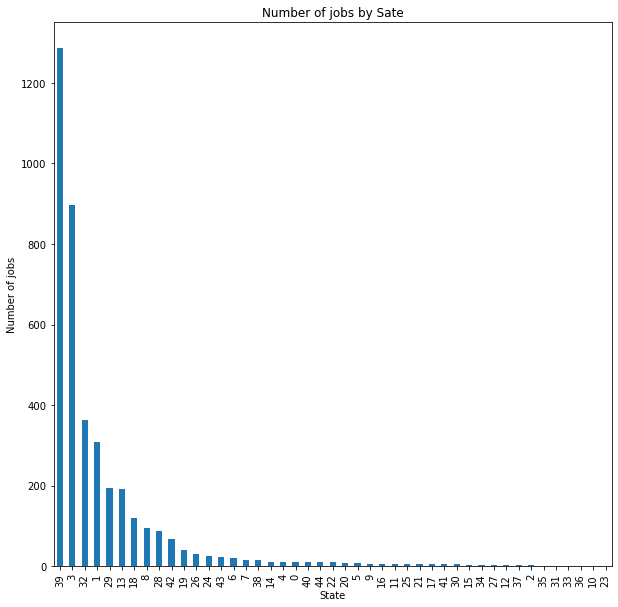

In [194]:
# Number of Jobs / State
#result['State'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
result['State_cat'].value_counts().plot(kind='bar', figsize=(10,10))
plt.title("Number of jobs by Sate")
plt.ylabel('Number of jobs')
plt.xlabel('State');

<AxesSubplot:xlabel='Ave_Salary', ylabel='State_cat'>

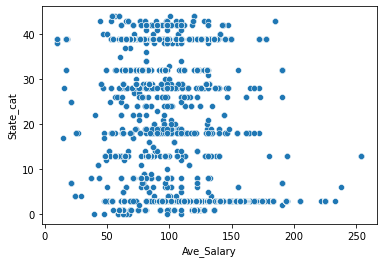

In [195]:
'''
State_c= result['State_cat'].sort_values( ascending=False)
Salary = result['Ave_Salary'].sort_values( ascending=False)
sns.scatterplot( x=Salary,y=State_c , data=result)
'''
State_c= result['State_cat']
Salary = result['Ave_Salary']
sns.scatterplot( x=Salary,y=State_c , data=result)

In [196]:
my_rho = np.corrcoef(State_c, Salary)

print(my_rho)

[[ 1.         -0.27739755]
 [-0.27739755  1.        ]]


<AxesSubplot:xlabel='Ave_Salary', ylabel='State_cat'>

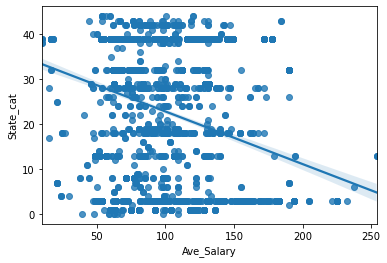

In [197]:
sns.regplot(x=Salary,y=State_c , data=result)

In [198]:
#Separate numerical and categorical variables
# I would like to consider 'State','City' in my analysis
result.loc[:,'Jobs']=1

numerical = ['Rating', 'Ave_Salary','Founded_Years', 'Max_Company_Size','Max_USD_Revenue','Jobs','State_cat',
             'Python_knowledge', 'MatLab_knowledge', 'PowerBI_knowledge',
             'SQL_knowledge','ETL_knowledge','Math_knowledge','DataB_knowledge']

# We should Eliminate Min_Salary,Max_Salary, Multiply, Founded
'''
numerical = ['Rating', 'Founded', 'Min_Salary','Max_Salary','Ave_Salary','Founded_Years', 'Max_Company_Size',
             'Multiply','Max_USD_Revenue','State_cat','Jobs','Python_knowledge', 'MatLab_knowledge', 'PowerBI_knowledge',
             'SQL_knowledge','ETL_knowledge','Math_knowledge','DataB_knowledge']
'''

#numerical = ['Rating', 'Founded', 'Min_Salary','Max_Salary','Ave_Salary','Founded_Years', 'Max_Company_Size','Multiply','Max_USD_Revenue','State_cat','Jobs']

'''
categorical = ['Python_knowledge', 'MatLab_knowledge', 'PowerBI_knowledge','SQL_knowledge','ETL_knowledge','Math_knowledge',
               'Work_Remote','GitHub_works','DataB_knowledge']
# Loop to change each categorical column form int32 to category type
for col in categorical:
    result[col] = result[col].astype('category')

result.shape
'''

d:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


"\ncategorical = ['Python_knowledge', 'MatLab_knowledge', 'PowerBI_knowledge','SQL_knowledge','ETL_knowledge','Math_knowledge',\n               'Work_Remote','GitHub_works','DataB_knowledge']\n# Loop to change each categorical column form int32 to category type\nfor col in categorical:\n    result[col] = result[col].astype('category')\n\nresult.shape\n"

In [199]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3909 entries, 0 to 3908
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Job Title          3909 non-null   object  
 1   Salary Estimate    3909 non-null   object  
 2   Job Description    3909 non-null   object  
 3   Rating             3909 non-null   float64 
 4   Company Name       3909 non-null   object  
 5   Location           3909 non-null   object  
 6   Size               3909 non-null   object  
 7   Founded            3909 non-null   int64   
 8   Type of ownership  3909 non-null   object  
 9   Industry           3909 non-null   object  
 10  Sector             3909 non-null   object  
 11  Revenue            3909 non-null   object  
 12  Min_Salary         3909 non-null   int32   
 13  Max_Salary         3909 non-null   int32   
 14  Ave_Salary         3909 non-null   float64 
 15  Founded_Years      3909 non-null   int64   
 16  City  

In [200]:
result.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Min_Salary,Max_Salary,Ave_Salary,Founded_Years,City,State,Max_Company_Size,Revenue_numbers,Multiply,Highest_Revenue,Max_USD_Revenue,Python_knowledge,MatLab_knowledge,PowerBI_knowledge,SQL_knowledge,ETL_knowledge,Math_knowledge,Work_Remote,GitHub_works,DataB_knowledge,State_cat,Jobs
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),53,91,72.0,48,Albuquerque,NM,1000,"[50, 100]",1000000,100,100000000,1,1,1,0,0,1,0,0,1,27,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),63,112,87.5,37,Linthicum,MD,10000,"[2, 5]",1000000000,5,5000000000,1,0,0,0,0,1,0,0,1,19,1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),80,90,85.0,11,Clearwater,FL,1000,"[100, 500]",1000000,500,500000000,1,0,0,1,0,1,0,0,0,8,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),56,97,76.5,56,Richland,WA,5000,"[500, 1]",1000000000,1,1000000000,1,0,0,0,0,1,0,0,0,43,1
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,86,143,114.5,23,New York,NY,200,[1],1,1,1,1,0,0,1,0,1,0,0,1,28,1


In [201]:
result 

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Min_Salary,Max_Salary,Ave_Salary,Founded_Years,City,State,Max_Company_Size,Revenue_numbers,Multiply,Highest_Revenue,Max_USD_Revenue,Python_knowledge,MatLab_knowledge,PowerBI_knowledge,SQL_knowledge,ETL_knowledge,Math_knowledge,Work_Remote,GitHub_works,DataB_knowledge,State_cat,Jobs
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),53,91,72.0,48,Albuquerque,NM,1000,"[50, 100]",1000000,100,100000000,1,1,1,0,0,1,0,0,1,27,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),63,112,87.5,37,Linthicum,MD,10000,"[2, 5]",1000000000,5,5000000000,1,0,0,0,0,1,0,0,1,19,1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),80,90,85.0,11,Clearwater,FL,1000,"[100, 500]",1000000,500,500000000,1,0,0,1,0,1,0,0,0,8,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),56,97,76.5,56,Richland,WA,5000,"[500, 1]",1000000000,1,1000000000,1,0,0,0,0,1,0,0,0,43,1
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,86,143,114.5,23,New York,NY,200,[1],1,1,1,1,0,0,1,0,1,0,0,1,28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,AWS Data Engineer,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital ...,4.4,Tachyon Technologies,"Dublin, OH",201 to 500 employees,2011,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),55,112,83.5,10,Dublin,OH,500,"[10, 25]",1000000,25,25000000,0,0,0,0,1,0,0,0,1,29,1
3905,Data Analyst â Junior,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze resul...",5.0,"Staffigo Technical Services, LLC","Columbus, OH",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),55,112,83.5,13,Columbus,OH,200,"[50, 100]",1000000,100,100000000,0,0,0,1,1,0,0,0,1,29,1
3906,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Eng...,3.8,"PDS Tech, Inc.","Dublin, OH",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),55,112,83.5,44,Dublin,OH,10000,"[100, 500]",1000000,500,500000000,1,0,1,1,0,0,0,0,1,29,1
3907,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),The Security Analytics Data Engineer will inte...,4.0,Data Resource Technologies,"Dublin, OH",1 to 50 employees,2021,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD),55,112,83.5,0,Dublin,OH,50,[1],1000000,1,1000000,1,0,1,1,0,0,0,0,1,29,1


In [202]:
# Detecting Outliers. Using IQR score technique

Q1s=result.loc[:,'Founded_Years'].quantile(0.25)
Q3s=result.loc[:,'Founded_Years'].quantile(0.75)
IQRs=Q3s-Q1s
Lower_Whiskers = abs(Q1s-1.5*IQRs)
Upper_Whiskers = Q3s+1.5*IQRs
medians = float(result.loc[:,'Founded_Years'].median())
result.loc[:,'Founded_Years']= np.where(result.loc[:,'Founded_Years'] >Upper_Whiskers, medians,result.loc[:,'Founded_Years'])

print(Q1s,Q3s,IQRs,Lower_Whiskers,Upper_Whiskers)
print(medians)
#result[result['Founded_Years']<1980]


6.0 52.0 46.0 63.0 121.0
21.0


d:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


<AxesSubplot:xlabel='Founded_Years'>

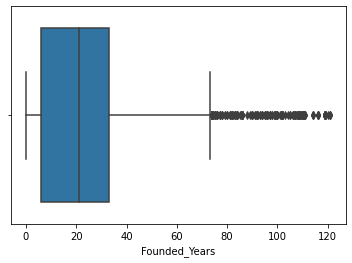

In [203]:
sns.boxplot(x=result['Founded_Years'])

In [204]:
Q1=result['Ave_Salary'].quantile(0.25)
Q3=result['Ave_Salary'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = abs(Q1-1.5*IQR)
Upper_Whisker = Q3+1.5*IQR
median = float(result['Ave_Salary'].median())
#result['Founded']= np.where(result['Founded'] >Upper_Whisker, median,result['Founded'])
result['Ave_Salary']= np.where(result['Ave_Salary'] <Lower_Whisker, median,result['Ave_Salary'])

print(Q1,Q3,IQR,Lower_Whisker,Upper_Whisker)
print(median)

73.0 128.5 55.5 10.25 211.75
98.0


d:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


<AxesSubplot:xlabel='Ave_Salary'>

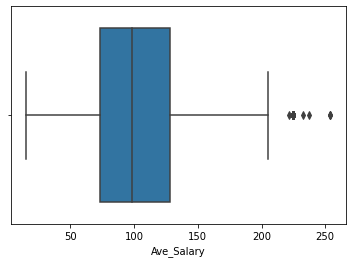

In [205]:
sns.boxplot(x=result['Ave_Salary'])

In [206]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3909 entries, 0 to 3908
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Job Title          3909 non-null   object  
 1   Salary Estimate    3909 non-null   object  
 2   Job Description    3909 non-null   object  
 3   Rating             3909 non-null   float64 
 4   Company Name       3909 non-null   object  
 5   Location           3909 non-null   object  
 6   Size               3909 non-null   object  
 7   Founded            3909 non-null   int64   
 8   Type of ownership  3909 non-null   object  
 9   Industry           3909 non-null   object  
 10  Sector             3909 non-null   object  
 11  Revenue            3909 non-null   object  
 12  Min_Salary         3909 non-null   int32   
 13  Max_Salary         3909 non-null   int32   
 14  Ave_Salary         3909 non-null   float64 
 15  Founded_Years      3909 non-null   float64 
 16  City  

In [207]:
print(result['Max_Company_Size'])

0        1000
1       10000
2        1000
3        5000
4         200
        ...  
3904      500
3905      200
3906    10000
3907       50
3908    10000
Name: Max_Company_Size, Length: 3909, dtype: int64


In [208]:
Q1=result['Max_Company_Size'].quantile(0.25)
Q3=result['Max_Company_Size'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = abs(Q1-1.5*IQR)
Upper_Whisker = Q3+1.5*IQR
median = float(result['Max_Company_Size'].median())
result.loc[:,'Max_Company_Size']= np.where(result.loc[:,'Max_Company_Size'] >Upper_Whisker, median,result.loc[:,'Max_Company_Size'])

print(Q1,Q3,IQR,Lower_Whisker,Upper_Whisker)
print(median)

200.0 10000.0 9800.0 14500.0 24700.0
1000.0


d:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


<AxesSubplot:xlabel='Max_Company_Size'>

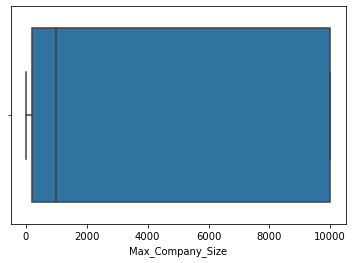

In [209]:
sns.boxplot(x=result['Max_Company_Size'])

1.0 5000000000.0 4999999999.0 7499999997.5 12499999998.5
50000000.0


d:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


<AxesSubplot:xlabel='Max_USD_Revenue'>

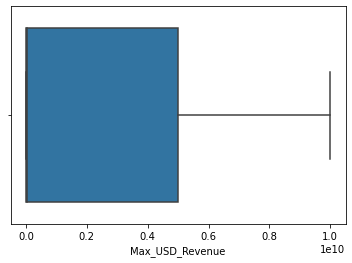

In [210]:
Q1=result.loc[:,'Max_USD_Revenue'].quantile(0.25)
Q3=result.loc[:,'Max_USD_Revenue'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = abs(Q1-1.5*IQR)
Upper_Whisker = Q3+1.5*IQR
median = float(result.loc[:,'Max_USD_Revenue'].median())
result.loc[:,'Max_USD_Revenue']= np.where(result.loc[:,'Max_USD_Revenue'] >Upper_Whisker, median,result.loc[:,'Max_USD_Revenue'])
#result['Max_USD_Revenue']= np.where(result['Max_USD_Revenue'] <Lower_Whiskers, medians,result['Max_USD_Revenue'])

print(Q1,Q3,IQR,Lower_Whisker,Upper_Whisker)
print(median)

sns.boxplot(x=result.loc[:,'Max_USD_Revenue'])

In [211]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3909 entries, 0 to 3908
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Job Title          3909 non-null   object  
 1   Salary Estimate    3909 non-null   object  
 2   Job Description    3909 non-null   object  
 3   Rating             3909 non-null   float64 
 4   Company Name       3909 non-null   object  
 5   Location           3909 non-null   object  
 6   Size               3909 non-null   object  
 7   Founded            3909 non-null   int64   
 8   Type of ownership  3909 non-null   object  
 9   Industry           3909 non-null   object  
 10  Sector             3909 non-null   object  
 11  Revenue            3909 non-null   object  
 12  Min_Salary         3909 non-null   int32   
 13  Max_Salary         3909 non-null   int32   
 14  Ave_Salary         3909 non-null   float64 
 15  Founded_Years      3909 non-null   float64 
 16  City  

In [212]:

# Relation Cities / Ave_Salary
City= result.set_index('City').groupby('City').mean()
City = City.sort_values("Ave_Salary", ascending=False)
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 2,
                       ):
    print(City.Ave_Salary.head)


<bound method NDFrame.head of City
Stanford                          193.50
Bellevue                          184.50
Lake Forest                       179.50
Los Gatos                         171.75
Newark                            170.75
Livermore                         170.12
Redwood City                      169.72
Novato                            168.00
Santa Clara                       165.26
Mountain View                     164.37
Menlo Park                        164.10
Burbank                           164.00
Sunnyvale                         162.64
Union City                        161.00
Fremont                           159.65
San Jose                          157.14
Campbell                          157.00
Los Altos                         156.50
Emeryville                        153.00
Palo Alto                         148.12
Fort Lee                          145.67
San Carlos                        144.62
Cupertino                         143.64
Brisbane              

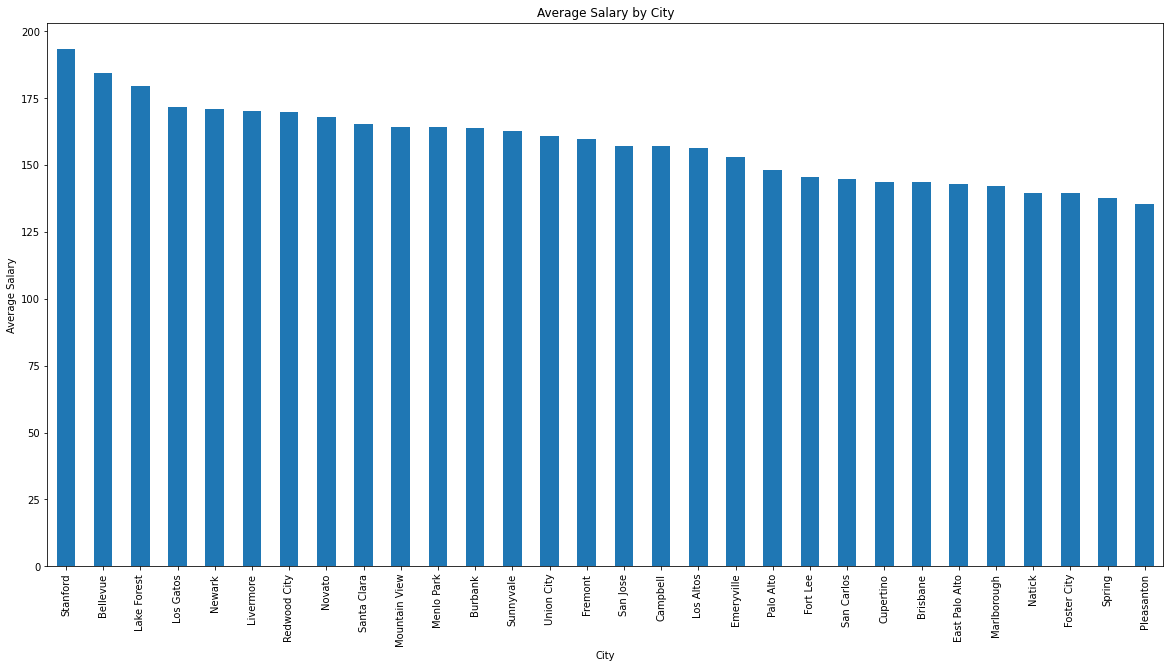

In [213]:
#Plot City
# Number of Jobs / State
#result['State'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
#City.Ave_Salary
City.Ave_Salary.sort_values(ascending=False)[:30].plot(kind='bar', figsize=(20,10))
plt.title("Average Salary by City")
plt.ylabel('Average Salary')
plt.xlabel('City');

<AxesSubplot:xlabel='Ave_Salary', ylabel='City'>

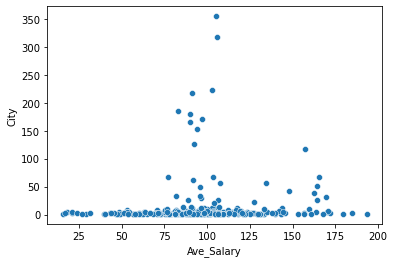

In [214]:
# Relation City / Ave_Salary
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 2,
                        ):
    City_c=result['City'].value_counts()

sns.scatterplot(x=City.Ave_Salary, y=City_c , data=result)

#### 2.6.3.5 Distribution Of Average Salary By State<a id='2.6.3.5_Distribution_Of_Average_Salary_By_State'></a>

##### 2.6.3.5.1 Average salary by state<a id='2.6.3.5.1_Average_salary_by_state'></a>

In [215]:
# I think that to have a better picture about DataS in all states, it is a good idea to create an 
# index with the states and then compare the relationship between this index and 
# the different features that we have.
# Relation States/Ave_Salary
State= result.set_index('State').groupby('State').mean()
State = State.sort_values("Ave_Salary", ascending=False)
print(State.Ave_Salary)

State
CA                           133.636719
Brentford, United Kingdom    132.750000
Ohio                         131.000000
MA                           106.336134
DC                           104.175000
NJ                           102.661290
MN                           100.875000
TN                           100.781250
MI                           100.428571
RI                           100.000000
NY                            99.215116
HI                            98.500000
NC                            97.875000
MD                            97.353659
KY                            97.000000
AZ                            96.998371
VA                            96.888060
WA                            95.543478
TX                            95.366641
United States                 95.000000
PA                            94.542818
UT                            94.150000
OH                            93.618557
OR                            92.125000
IN                            92.0

In [216]:
# I think that to have a better picture about DataS in all states, it is a good idea to create an 
# index with the states and then compare the relationship between this index and 
# the different features that we have.
# Relation States/Ave_Salary

# data.groupby(['month', 'item'])
State= result.set_index('State').groupby('State').mean()
State = State.sort_values("Ave_Salary", ascending=True)
print(State.Ave_Salary)
#State.info()


State
LA                            51.000000
NE                            53.100000
SC                            60.500000
Stevenage, United Kingdom     66.500000
AL                            67.150000
WI                            73.300000
ID                            74.000000
NM                            74.333333
CO                            75.000000
IA                            78.900000
FL                            79.962766
GA                            80.666667
SD                            81.500000
MO                            84.400000
CT                            85.142857
KS                            87.000000
IL                            88.806283
Maryland                      90.500000
Remote                        90.833333
DE                            91.343750
IN                            92.045455
OR                            92.125000
OH                            93.618557
UT                            94.150000
PA                            94.5

In [217]:
#print(result[["Ave_Salary","State_cat"]].groupby(["Ave_Salary"]).mean().sort_values(["Ave_Salary","State_cat"], ascending=True))
colum=result[['State_cat','State','Ave_Salary']]
#print(colum)
listUnVals = {}

#fins=colum['State_cat']+Salary_s[]
#print(fins)
unwanted = ["Ave_Salary" ]
for col in colum:
    if col not in unwanted:
        listUnVals[col] = (colum[col].unique())
#print(listUnVals)    
imp=pd.DataFrame(listUnVals)
#print(imp)

State_s= colum.set_index('State').groupby('State').mean()
Salary_s = State_s.sort_values("Ave_Salary", ascending=True)
#print(Salary_s.Ave_Salary)
#Salary_s.info()

final=pd.merge(imp,Salary_s,how='inner',on='State_cat')
final=final.sort_values("Ave_Salary", ascending=False)
print(final)

    State_cat                      State  Ave_Salary
6           3                         CA  133.636719
44          2  Brentford, United Kingdom  132.750000
37         31                       Ohio  131.000000
8          18                         MA  106.336134
16          6                         DC  104.175000
9          26                         NJ  102.661290
28         21                         MN  100.875000
30         38                         TN  100.781250
15         20                         MI  100.428571
33         33                         RI  100.000000
4          28                         NY   99.215116
41         10                         HI   98.500000
25         24                         NC   97.875000
1          19                         MD   97.353659
12         16                         KY   97.000000
26          1                         AZ   96.998371
7          42                         VA   96.888060
3          43                         WA   95.

### 2.6.4 Numeric Features<a id='2.6.4_Numeric_Features'></a>

In [218]:
# Relation State/ Rating
#State= result.set_index('State').groupby('State').mean()
State = State.sort_values("Rating", ascending=False)
print(State.Rating)

State
SC                           4.400000
UT                           4.240000
AL                           4.180000
MO                           4.130000
IA                           4.100000
IN                           4.063636
MI                           3.985714
ID                           3.933333
Stevenage, United Kingdom    3.900000
Brentford, United Kingdom    3.900000
MN                           3.900000
VA                           3.801493
WA                           3.800000
CO                           3.790909
KS                           3.700000
GA                           3.666667
MD                           3.614634
OH                           3.613918
Ohio                         3.600000
NM                           3.600000
NY                           3.596512
MA                           3.590756
LA                           3.575000
CA                           3.552790
DE                           3.543750
United States                3.525000
KY    

In [219]:
# Relation State/ Max Revenue of Company
#State= result.set_index('State').groupby('State').mean()
State = State.sort_values("Max_USD_Revenue", ascending=False)
print(State.Max_USD_Revenue)

State
Stevenage, United Kingdom    1.000000e+10
Ohio                         1.000000e+10
Brentford, United Kingdom    1.000000e+10
CT                           7.143000e+09
KY                           6.675000e+09
NC                           5.770833e+09
MA                           4.781471e+09
TN                           4.312500e+09
NE                           4.200000e+09
ID                           3.400000e+09
OH                           3.062603e+09
MD                           3.017195e+09
DE                           2.731875e+09
CA                           2.631595e+09
NY                           2.585535e+09
TX                           2.290282e+09
PA                           2.176050e+09
AL                           2.120000e+09
NJ                           2.102742e+09
IL                           2.097618e+09
AZ                           2.077026e+09
IN                           1.936364e+09
DC                           1.802800e+09
MI                          

In [220]:
# Relation State / Amount of founded years
#State= result.set_index('State').groupby('State').mean()
State = State.sort_values("Founded_Years", ascending=False)
print(State.Founded_Years)

State
Ohio                         96.000000
SC                           92.000000
RI                           82.000000
CO                           60.818182
OR                           60.500000
WI                           52.600000
MD                           52.243902
DE                           48.312500
WA                           48.086957
KS                           48.000000
NE                           43.800000
KY                           42.666667
AL                           41.100000
IN                           41.090909
TN                           40.875000
ID                           32.333333
IL                           30.136126
NM                           30.000000
MI                           29.142857
LA                           28.250000
OH                           27.927835
TX                           27.580093
NJ                           26.774194
VA                           26.522388
CT                           26.428571
IA                 

In [221]:
# Relation State / Company Size
#State= result.set_index('State').groupby('State').mean()
State = State.sort_values("Max_Company_Size", ascending=False)
print(State.Max_Company_Size)

State
Ohio                         10000.000000
Brentford, United Kingdom    10000.000000
Stevenage, United Kingdom    10000.000000
NC                            7333.375000
CT                            7314.285714
TN                            7218.750000
NE                            7000.000000
NM                            7000.000000
KY                            6733.333333
UT                            6560.000000
OR                            6250.000000
MA                            5465.605042
OH                            5124.783505
DE                            4806.312500
WA                            4713.043478
NY                            4416.290698
GA                            4233.333333
PA                            4170.770718
CA                            4035.379464
IL                            3986.706806
MD                            3969.512195
TX                            3966.374028
VA                            3952.238806
NJ                          

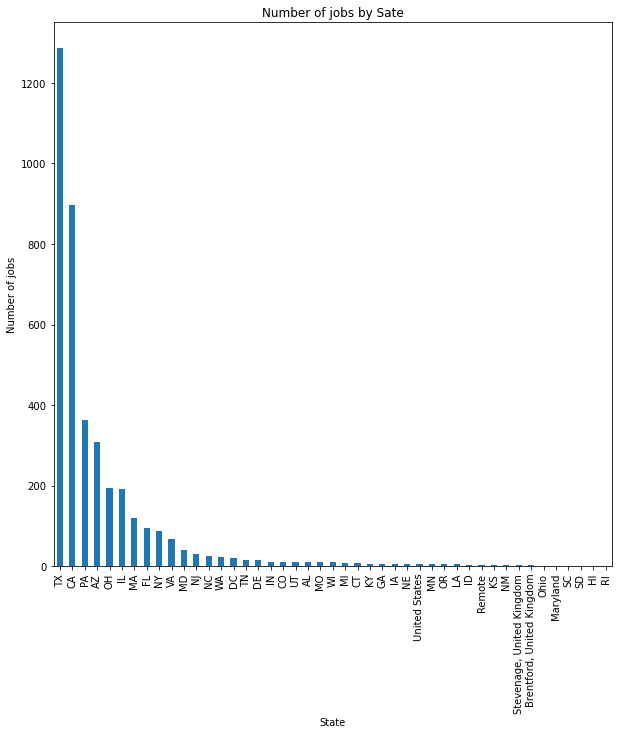

In [222]:
# Number of Jobs / State
#result['State'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
result['State'].value_counts().plot(kind='bar', figsize=(10,10))
plt.title("Number of jobs by Sate")
plt.ylabel('Number of jobs')
plt.xlabel('State');


#### 2.6.3.2 City And State<a id='2.6.3.2_City_And_State'></a>

In [223]:
# Relation City / Amount of jobs
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 2,
                        ):
    print(result['City'].value_counts())

Austin                            355
San Diego                         318
Houston                           223
Philadelphia                      217
Dallas                            186
San Antonio                       180
Phoenix                           172
Chicago                           166
Columbus                          153
Irving                            126
San Jose                          118
Santa Clara                        68
Jacksonville                       68
New York                           67
Plano                              62
San Francisco                      56
Cambridge                          56
Mountain View                      52
Tempe                              49
Palo Alto                          42
Sunnyvale                          38
Fort Worth                         34
Scottsdale                         33
Redwood City                       32
Chandler                           30
Menlo Park                         26
Arlington   

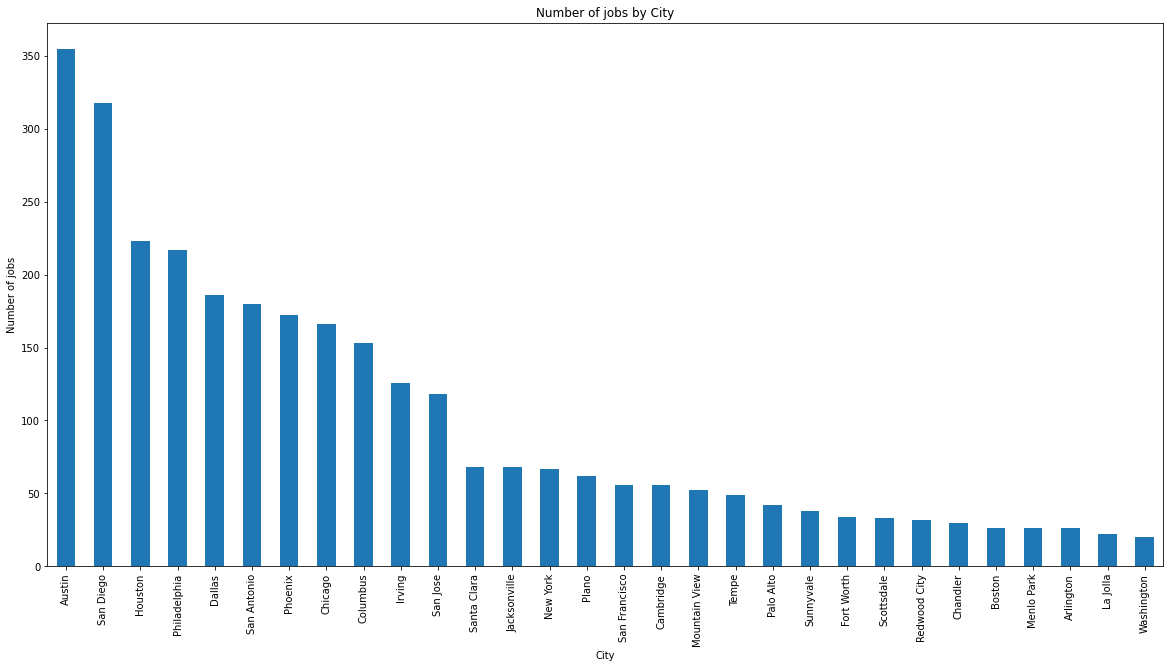

In [224]:
#Plot City
# Number of Jobs / State
#result['State'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
result['City'].value_counts().sort_values(ascending=False)[:30].plot(kind='bar', figsize=(20,10))
plt.title("Number of jobs by City")
plt.ylabel('Number of jobs')
plt.xlabel('City');

In [225]:
# Relation State / Amount of Cities per sate with DS jobs
# I want to group by States and Cities
#State= result.set_index('State').groupby('State').mean()\
unique_cities = result.groupby('State')['City'].nunique()
print(unique_cities)

State
AL                            3
AZ                           10
Brentford, United Kingdom     1
CA                           55
CO                            5
CT                            4
DC                            1
DE                            3
FL                           15
GA                            2
HI                            1
IA                            3
ID                            2
IL                           15
IN                            3
KS                            1
KY                            2
LA                            2
MA                           17
MD                           15
MI                            4
MN                            2
MO                            5
Maryland                      1
NC                            5
NE                            1
NJ                           15
NM                            1
NY                           10
OH                           15
OR                            3
Oh

In [226]:
''' Relation State,City / Rest of features

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                        ):
    print(result.groupby(['State','City']).count())'''

" Relation State,City / Rest of features\n\nwith pd.option_context('display.max_rows', None,\n                       'display.max_columns', None,\n                       'display.precision', 3,\n                        ):\n    print(result.groupby(['State','City']).count())"

In [227]:
# Relation State, Python / Ave_salary
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 2,
                        ):
    # Trying to see relations
    p_s= result.groupby(['State', 'Python_knowledge'])['Ave_Salary'].mean()
    print(p_s)

State                      Python_knowledge
AL                         0                    70.08
                           1                    62.75
AZ                         0                    94.16
                           1                   100.13
Brentford, United Kingdom  0                    75.50
                           1                   190.00
CA                         0                   122.47
                           1                   142.89
CO                         0                    25.38
                           1                   103.36
CT                         0                    81.08
                           1                   109.50
DC                         0                    94.00
                           1                   112.50
DE                         0                    63.25
                           1                   119.44
FL                         0                    76.93
                           1          

In [228]:
#Relation State, Python / Ave_Salary Desc order
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 2,
                        ):
    # Trying to see relations
    p_s= result.groupby(['State', 'Python_knowledge'])['Ave_Salary'].mean()
    #print(p_s)
    p_s=p_s.reset_index()
    p_s=p_s.sort_values(by='Ave_Salary', ascending=False)
    print(p_s)

                        State  Python_knowledge  Ave_Salary
5   Brentford, United Kingdom                 1      190.00
7                          CA                 1      142.89
63                       Ohio                 1      131.00
6                          CA                 0      122.47
89                         WI                 1      120.00
15                         DE                 1      119.44
81                         UT                 1      117.12
53                         NJ                 1      117.07
23                         IA                 1      115.50
42                         MN                 0      113.00
13                         DC                 1      112.50
37                         MA                 1      112.48
39                         MD                 1      111.61
51                         NE                 1      109.50
11                         CT                 1      109.50
45                         MO           

In [229]:
# Relation DataB_knowledge, SQL_knowledge  /  Ave_Salary
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 2,
                        ):
    # Trying to see relations
    p_s= result.groupby(['DataB_knowledge', 'SQL_knowledge'])['Ave_Salary'].mean()
    print(p_s)

DataB_knowledge  SQL_knowledge
0                0                103.53
                 1                106.45
1                0                100.18
                 1                103.30
Name: Ave_Salary, dtype: float64


In [230]:
# Relation Python_knowledge,MatLab_knowledge / Ave_Salary
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 2,
                        ):
    # Trying to see relations
    p_s= result.groupby(['Python_knowledge', 'MatLab_knowledge'])['Ave_Salary'].mean()
    print(p_s)

Python_knowledge  MatLab_knowledge
0                 0                    97.00
                  1                   110.26
1                 0                   109.42
                  1                   116.20
Name: Ave_Salary, dtype: float64


In [231]:
#Relation Python_knowledge ,GitHub_works / Ave_Salary
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 2,
                        ):
    # Trying to see relations
    p_s= result.groupby(['Python_knowledge', 'GitHub_works'])['State'].count()
    print(p_s)

Python_knowledge  GitHub_works
0                 0               1946
                  1                 10
1                 0               1885
                  1                 68
Name: State, dtype: int64


In [232]:
# Rlation GitHub_works / Amount of jobs per State
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 2,
                        ):
    # Trying to see relations
    p_s= result.groupby(['GitHub_works'])['State'].count()
    print(p_s)

GitHub_works
0    3831
1      78
Name: State, dtype: int64


In [233]:
# Relation Python_knowledge / Amount of jobs per State
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 2,
                        ):
    # Trying to see relations
    p_s= result.groupby(['Python_knowledge'])['State'].count()
    print(p_s)

Python_knowledge
0    1956
1    1953
Name: State, dtype: int64


In [234]:
# Relation Python_knowledge / Ave_Salary
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 2,
                        ):
    # Trying to see relations
    p_s= result.groupby(['Python_knowledge'])['Ave_Salary'].mean()
    print(p_s)

Python_knowledge
0     97.23
1    109.95
Name: Ave_Salary, dtype: float64


In [235]:
# Relation MatLab_knowledge / Ave_Salary
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 2,
                        ):
    # Trying to see relations
    p_s= result.groupby(['MatLab_knowledge'])['Ave_Salary'].mean()
    print(p_s)

MatLab_knowledge
0    103.01
1    115.10
Name: Ave_Salary, dtype: float64


In [236]:
# Relation Company Size / Ave_Salary Desc order
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 2,
                        ):
    # Trying to see relations
    p_s= result.groupby(['Max_Company_Size'])['Ave_Salary'].mean()
    p_s=p_s.reset_index()
    p_s=p_s.sort_values(by='Ave_Salary', ascending=False)
    print(p_s)

   Max_Company_Size  Ave_Salary
6           10000.0      107.48
2             200.0      105.75
1              50.0      102.16
5            5000.0      102.10
3             500.0      100.24
0               1.0       99.38
4            1000.0       98.56


In [237]:
# Relation Amount of founded Years / Ave_Salary Desc order
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 2,
                        ):
    # Trying to see relations
    p_s= result.groupby(['Founded_Years'])['Ave_Salary'].mean()
    p_s=p_s.reset_index()
    p_s=p_s.sort_values(by='Ave_Salary', ascending=False)
    print(p_s)

     Founded_Years  Ave_Salary
1              1.0      172.00
86            88.0      172.00
110          114.0      158.50
107          109.0      138.38
45            45.0      132.04
92            94.0      132.00
71            72.0      132.00
99           101.0      126.00
12            12.0      125.94
23            23.0      124.56
5              5.0      123.88
68            69.0      122.44
59            59.0      119.18
39            39.0      119.15
17            17.0      118.44
11            11.0      116.89
28            28.0      116.85
81            82.0      116.57
106          108.0      116.50
78            79.0      115.75
9              9.0      115.57
14            14.0      115.24
64            65.0      114.50
103          105.0      114.00
7              7.0      113.59
10            10.0      113.22
69            70.0      113.21
46            46.0      112.70
6              6.0      112.41
41            41.0      112.27
51            51.0      110.88
15      

In [238]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3909 entries, 0 to 3908
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Job Title          3909 non-null   object  
 1   Salary Estimate    3909 non-null   object  
 2   Job Description    3909 non-null   object  
 3   Rating             3909 non-null   float64 
 4   Company Name       3909 non-null   object  
 5   Location           3909 non-null   object  
 6   Size               3909 non-null   object  
 7   Founded            3909 non-null   int64   
 8   Type of ownership  3909 non-null   object  
 9   Industry           3909 non-null   object  
 10  Sector             3909 non-null   object  
 11  Revenue            3909 non-null   object  
 12  Min_Salary         3909 non-null   int32   
 13  Max_Salary         3909 non-null   int32   
 14  Ave_Salary         3909 non-null   float64 
 15  Founded_Years      3909 non-null   float64 
 16  City  

In [239]:
# Second Part of the Project--> EDA
# any


In [240]:
Numer_not_useful=['Min_Salary','Max_Salary', 'Multiply','Revenue_numbers','Revenue','Founded']

In [241]:
result=result.drop(columns=Numer_not_useful,  axis=1)

In [242]:
All_Non_numer=['Job Title','Salary Estimate','Job Description','Company Name','Location','Size','Type of ownership',
               'Industry','Sector']

In [243]:
result = result.drop(labels=All_Non_numer, axis=1)

In [244]:
# Finding Correlations
result.corr()

,Rating,Ave_Salary,Founded_Years,Max_Company_Size,Max_USD_Revenue,Python_knowledge,MatLab_knowledge,PowerBI_knowledge,SQL_knowledge,ETL_knowledge,Math_knowledge,Work_Remote,GitHub_works,DataB_knowledge,State_cat,Jobs
Rating,1.000000,0.079928,0.184487,0.180253,0.133147,0.060749,0.000548,-0.008888,0.040580,0.035605,0.027517,-0.075987,0.013514,0.003458,-0.043252,NaN
Ave_Salary,0.079928,1.000000,-0.027204,0.065153,0.122259,0.169296,0.068864,-0.053405,0.023053,-0.036813,0.083654,-0.070445,-0.009224,-0.027043,-0.275447,NaN
Founded_Years,0.184487,-0.027204,1.000000,0.528170,0.441964,0.017200,0.057649,0.051062,-0.022963,-0.008921,0.138675,-0.062851,-0.015045,-0.020860,0.063066,NaN
Max_Company_Size,0.180253,0.065153,0.528170,1.000000,0.760529,-0.012142,0.078198,0.023833,-0.043861,-0.048607,0.115261,-0.109754,-0.031058,0.006168,0.018707,NaN
Max_USD_Revenue,0.133147,0.122259,0.441964,0.760529,1.000000,0.055932,0.069939,0.015854,-0.008231,-0.011703,0.151738,-0.085763,-0.025684,-0.002692,-0.021787,NaN
Python_knowledge,0.060749,0.169296,0.017200,-0.012142,0.055932,1.000000,0.141255,0.053095,0.339487,0.111033,0.245521,0.059011,0.106212,0.102419,-0.018859,NaN
MatLab_knowledge,0.000548,0.068864,0.057649,0.078198,0.069939,0.141255,1.000000,0.000681,-0.033283,-0.056132,0.116484,0.023258,0.010676,-0.005153,-0.051573,NaN
PowerBI_knowledge,-0.008888,-0.053405,0.051062,0.023833,0.015854,0.053095,0.000681,1.000000,0.216735,0.100357,0.047012,0.033674,-0.005229,0.129911,0.042915,NaN
SQL_knowledge,0.040580,0.023053,-0.022963,-0.043861,-0.008231,0.339487,-0.033283,0.216735,1.000000,0.328799,0.130256,0.024368,0.041891,0.393816,0.024072,NaN
ETL_knowledge,0.035605,-0.036813,-0.008921,-0.048607,-0.011703,0.111033,-0.056132,0.100357,0.328799,1.000000,-0.036396,0.009370,0.017171,0.236912,0.054004,NaN


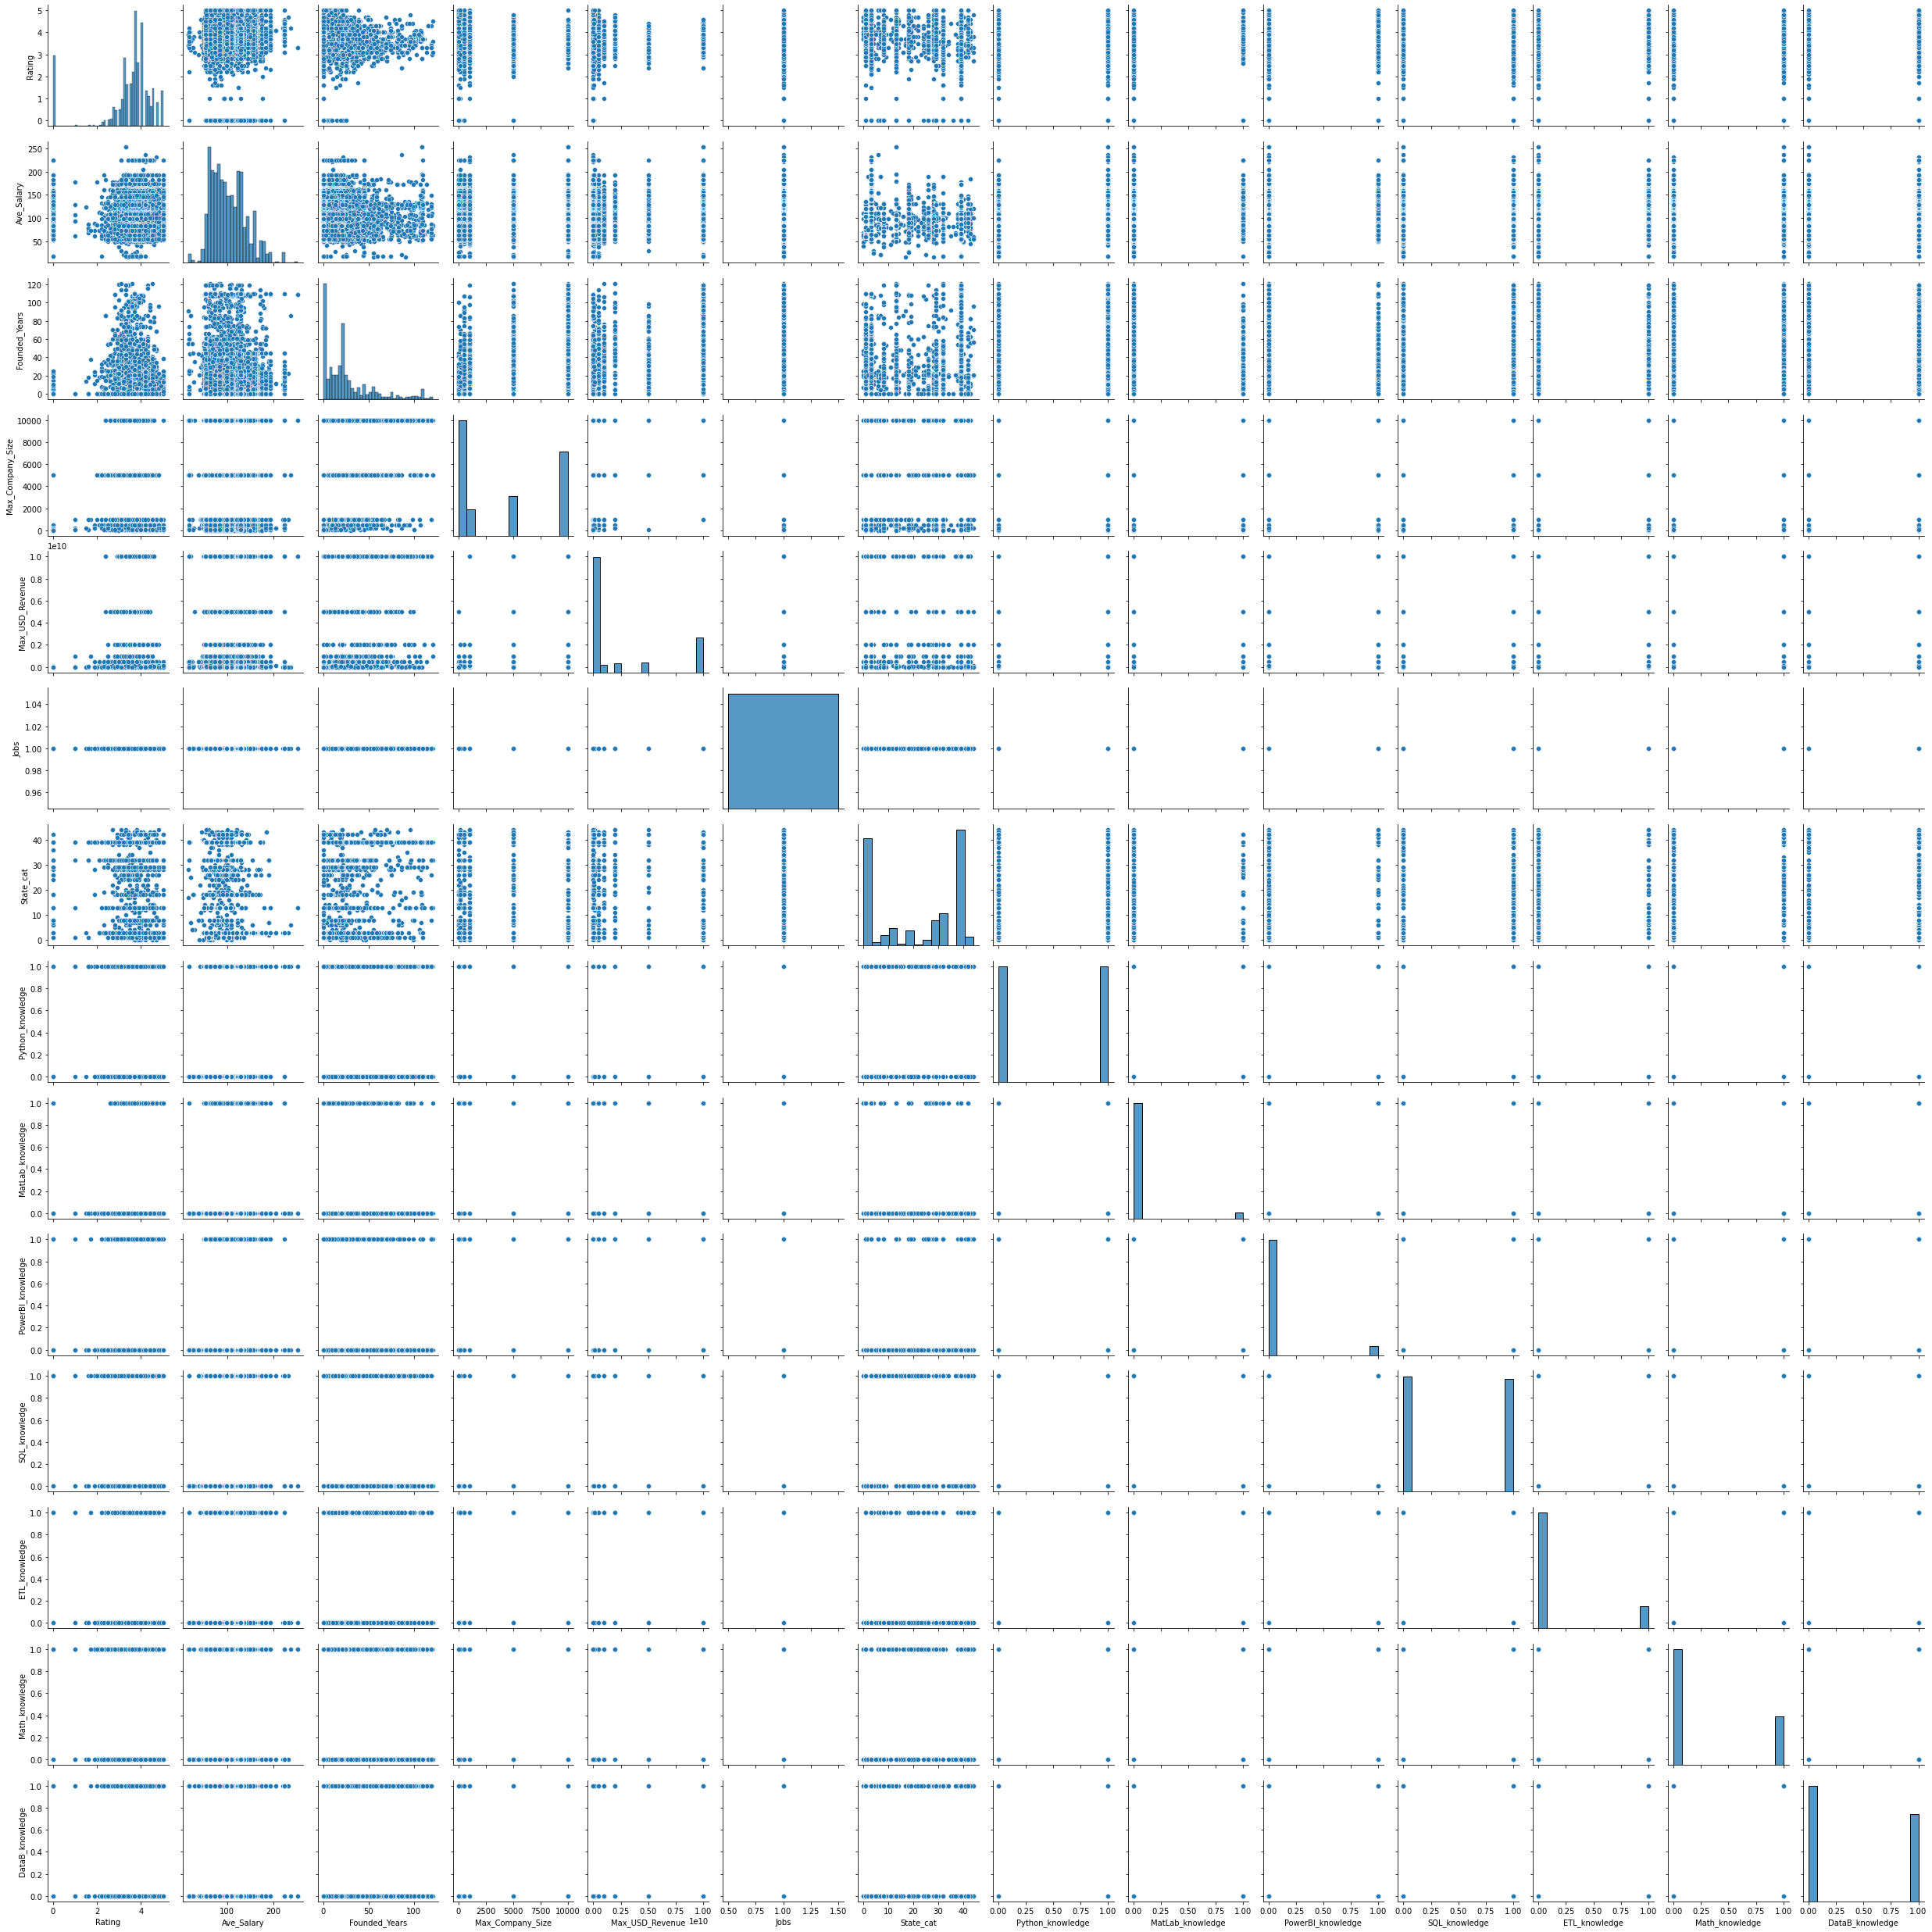

In [245]:
sns.pairplot(result[numerical])


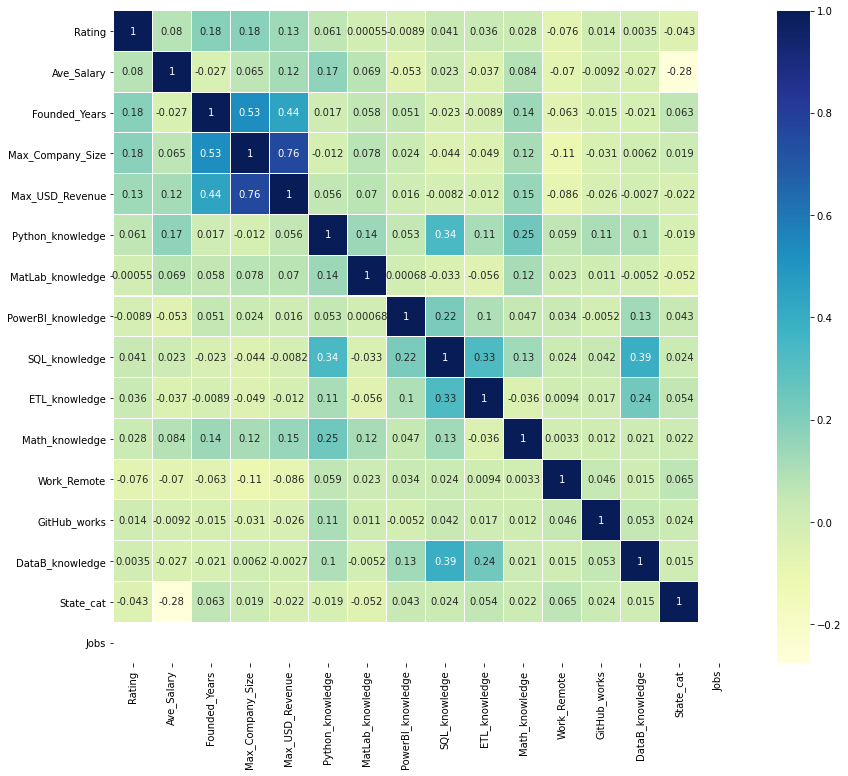

In [246]:
plt.figure(figsize=(14,12))
sns.heatmap(result.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [247]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3909 entries, 0 to 3908
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rating             3909 non-null   float64 
 1   Ave_Salary         3909 non-null   float64 
 2   Founded_Years      3909 non-null   float64 
 3   City               3909 non-null   object  
 4   State              3909 non-null   category
 5   Max_Company_Size   3909 non-null   float64 
 6   Highest_Revenue    3909 non-null   object  
 7   Max_USD_Revenue    3909 non-null   float64 
 8   Python_knowledge   3909 non-null   int32   
 9   MatLab_knowledge   3909 non-null   int32   
 10  PowerBI_knowledge  3909 non-null   int32   
 11  SQL_knowledge      3909 non-null   int32   
 12  ETL_knowledge      3909 non-null   int32   
 13  Math_knowledge     3909 non-null   int32   
 14  Work_Remote        3909 non-null   int32   
 15  GitHub_works       3909 non-null   int32   
 16  DataB_

In [248]:
result.SQL_knowledge.dtype

dtype('int32')

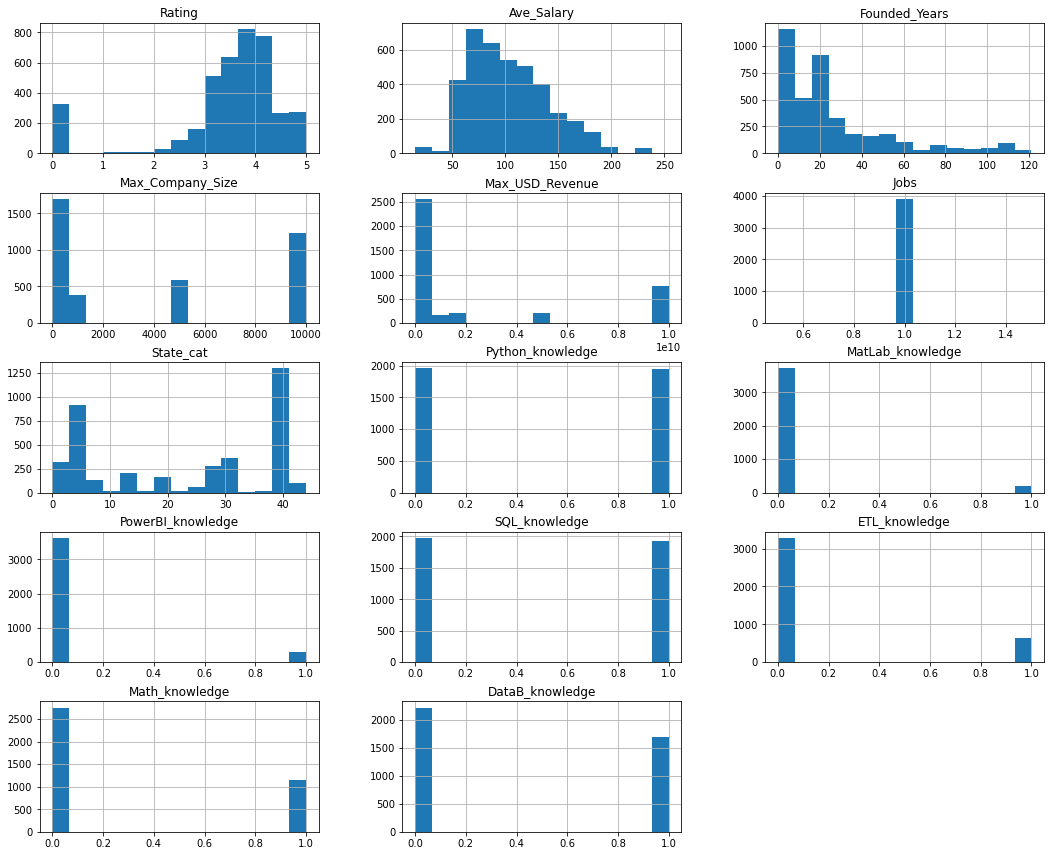

In [249]:
# Showing numerical Variables
result[numerical].hist(bins=15, figsize=(18, 18), layout=(6, 3));

In [250]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3909 entries, 0 to 3908
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rating             3909 non-null   float64 
 1   Ave_Salary         3909 non-null   float64 
 2   Founded_Years      3909 non-null   float64 
 3   City               3909 non-null   object  
 4   State              3909 non-null   category
 5   Max_Company_Size   3909 non-null   float64 
 6   Highest_Revenue    3909 non-null   object  
 7   Max_USD_Revenue    3909 non-null   float64 
 8   Python_knowledge   3909 non-null   int32   
 9   MatLab_knowledge   3909 non-null   int32   
 10  PowerBI_knowledge  3909 non-null   int32   
 11  SQL_knowledge      3909 non-null   int32   
 12  ETL_knowledge      3909 non-null   int32   
 13  Math_knowledge     3909 non-null   int32   
 14  Work_Remote        3909 non-null   int32   
 15  GitHub_works       3909 non-null   int32   
 16  DataB_

In [251]:
result.head()

,Rating,Ave_Salary,Founded_Years,City,State,Max_Company_Size,Highest_Revenue,Max_USD_Revenue,Python_knowledge,MatLab_knowledge,PowerBI_knowledge,SQL_knowledge,ETL_knowledge,Math_knowledge,Work_Remote,GitHub_works,DataB_knowledge,State_cat,Jobs
0,3.8,72.0,48.0,Albuquerque,NM,1000.0,100,1.000000e+08,1,1,1,0,0,1,0,0,1,27,1
1,3.4,87.5,37.0,Linthicum,MD,10000.0,5,5.000000e+09,1,0,0,0,0,1,0,0,1,19,1
2,4.8,85.0,11.0,Clearwater,FL,1000.0,500,5.000000e+08,1,0,0,1,0,1,0,0,0,8,1
3,3.8,76.5,56.0,Richland,WA,5000.0,1,1.000000e+09,1,0,0,0,0,1,0,0,0,43,1
4,2.9,114.5,23.0,New York,NY,200.0,1,1.000000e+00,1,0,0,1,0,1,0,0,1,28,1


In [252]:
#All_Non_numer=['Job Title','Salary Estimate','Job Description','Company Name','Location','Size','Type of ownership','Industry','Sector']

In [253]:
#result_num = result.drop(labels=All_Non_numer, axis=1)

In [254]:
result = result.drop(labels='State_cat', axis=1)

Saving

In [255]:
result.to_csv (r'./data/intermediate/result_numer.csv', index = False, header=True)